In [104]:
#from __future__ import print_function

import numpy as np
import pandas as pd
from collections import OrderedDict #sorting participant df dict before pd.concat()
import matplotlib.pylab as plt
%matplotlib inline

pd.options.display.mpl_style = 'default'
import cPickle as pickle

pilot_data = ['010', '011', '012', '013', '014',]
non_english_fluent  = ['023', '031', '045', '050', '070', '106',]
left_handed = ['042', '088',]
pro_inst_skill = ['026', '037']

excluded_all_tasks = pilot_data + non_english_fluent + left_handed + pro_inst_skill

## Utility functions

In [105]:
def col_matches(df, regex):
    'returns a list of columns in a df that match a regex string.'
    import re
    cols = list(enumerate(df.columns))
    matches = [c for (i, c) in cols 
               if re.findall(regex, c)]
    return matches

def compare_transformations(df, columns, functions, **kwargs):    
    print('raw')
    df[columns].hist(**kwargs)
    plt.show()
    
    for name, func in functions.items():       
        print(name)        
        df[columns].apply(func).hist(**kwargs)
        plt.show()
        
        
def quickcompare(r, df, size=(15,7)): 
    inverse = lambda x: 1.0/x
    return compare_transformations(df, col_matches(df, r),
                                   {'inverse': inverse,
                                    'log1p': np.log1p,
                                    'sqrt':  np.sqrt,  },
                                    figsize=size)


# using this for inline documentation so that it's clear
# that the printing statement isn't part of the necessary
# transformation code.
def html_print(df):
    from IPython.display import HTML    
    try:
        out = df.to_html()
    except AttributeError:
        out = pd.DataFrame(df).to_html()
    return HTML(out)


def htmljoin(df_list, delimiter=''):
    from IPython.display import HTML
    return HTML(delimiter.join([x.to_html() for x in df_list]))
    
    
def col_matches(df, regex):     
    import re    
    cols = list(enumerate(df.columns))       
    matches = [c for (i, c) in cols 
               if re.findall(regex, c)]      
    return matches


def concat_matches(df, *args):    
    assert all([len(r) for r in args])
    import re        
    col_match_lists = [col_matches(df, regex) for regex in args]    
    col_set = [df[matches] for matches in col_match_lists]    
    if len(col_set) == 0:
        return None    
    elif len(col_set) == 1:
        return col_set[0]    
    else:
        return pd.concat(col_set, axis=1)

    
def show_frames(frame_list, delimiter=''):
    
    from IPython.display import HTML
    
    if len(frame_list) == len(delimiter):        
        html_out = ""
        item_template = '<p><strong>{}</strong></p>{}<br>'      
        
        for i, tup in enumerate(zip(frame_list, delimiter)):
            frame = tup[0]
            tag = tup[1]
            html_out += item_template.format(tag, frame.to_html())            
        return HTML(html_out)
        
    else:        
        html_out = [df.to_html() for df in frame_list]        
        return HTML(delimiter.join(html_out))
    

def hist_all(df, *args, **kwargs):
    numcols = len(df.columns)
    if numcols > 30:
        yn = raw_input(str(numcols) + " columns. Proceed?")
        if 'n' in yn: return None
    for c in df:
        print(c)
        try:
            plt.hist(df[c])
            plt.show()
        except:
            print("\t(can't histogram this)\n")
            

def scatter_all(df, print_max=None, *args, **kwargs):    
    from itertools import combinations       
    numcols = len(df.columns)
    if numcols > 6:
        yn = raw_input(str(numcols) + " columns. Proceed?")
        if 'n' in yn: return None
    
    combos = combinations(df.columns, 2)
    for c in combos:
        print(c)
        x = df[c[0]]
        y = df[c[1]]
        
        dfc = pd.concat([x, y], axis=1)
        xsort = dfc.sort(columns=dfc.columns[0], inplace=False)
        ysort = dfc.sort(columns=dfc.columns[1], inplace=False)        
        
        #print(dfc)
        try:
            dfc.plot(kind='scatter', x=0, y=1)
            plt.show()
        except:
            print("can't plot")
        
        if print_max:
            print(xsort.head(print_max))
            print(ysort.head(print_max))


## Importing data, exporting partial info to CSV for SPSS

In [106]:
pfilenames = "c:/db_pickles/pickle - dfo-{measure} - {updated}.pickle"
full_updated = '2014-10-13a'

#pfile = pfilenames.format(measure='full', updated=full_updated)
pfile = pfilenames.format(measure='flat', updated=full_updated)
print(pfile)

with open(pfile) as f:
    dfo = pickle.load(f)

#for quick searches later
match = lambda x: concat_matches(dfo, x)

dfo = dfo.replace(77777, np.nan)
dfo = dfo.replace('77777', np.nan)

#task_pids = {k: sorted(set(v.index.get_level_values('pid')))
#             for (k, v) in task_frames.items()}

to_drop = set(dfo.index).intersection(excluded_all_tasks)

dfo = dfo.drop(to_drop)

c:/db_pickles/pickle - dfo-flat - 2014-10-13a.pickle


In [107]:
dfo.count()

SCAL_session_day                      97
SCAL_session_time                     97
SCAL_session_isfemale                 97
SCAL_exclusion_jitterlinearmissing    97
SCAL_exclusion_rhythmadminerror       97
SCAL_sex_femalezero                   97
SCAL_participant_age                  97
SCAL_calc_wasivocab_totalrawscore     97
SCAL_calc_wasimatrix_totalscore       96
SCAL_calc_wasivocab_tscore            97
SCAL_calc_wasimatrix_tscore           96
SCAL_calc_wasi_tscore_total           96
SCAL_calc_fsiq2                       96
SCAL_calc_bfi_extraversion            97
SCAL_calc_bfi_agreeableness           97
...
I8P4_lagdev_mean               96
I8P4_lagdev_local_sq_abs       96
I8P4_lagdev_local              96
I8P4_lagdev_drift              96
I8L2_ints_count                96
I8L2_ints_mean                 96
I8L2_ints_variance             96
I8L2_ints_stdev                96
I8L2_ints_lag2corr             96
I8L2_lag2devsq_sum             96
I8L2_lag2devsq_count           96
I8L2_la

In [108]:
match('order').T

,015,016,017,018,019,020,021,022,024,025,...,112,113,114,115,116,117,118,119,120,121
SCAL_session_taskorder,"3. Lin, Iso, Jump","1. Iso, Lin, Jump","3. Lin, Iso, Jump","5. Jump, Iso, Lin","3. Lin, Iso, Jump","6. Jump, Lin, Iso","1. Iso, Lin, Jump","6. Jump, Lin, Iso","1. Iso, Lin, Jump","2. Iso, Jump, Lin",...,"2. Iso, Jump, Lin","5. Jump, Iso, Lin","5. Jump, Iso, Lin","2. Iso, Jump, Lin","3. Lin, Iso, Jump","6. Jump, Lin, Iso","5. Jump, Iso, Lin","6. Jump, Lin, Iso","1. Iso, Lin, Jump","6. Jump, Lin, Iso"
SCAL_order_500ms_first,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,1,1,1,1,0,1
SCAL_order_rhythmfirst,0,0,1,1,0,0,1,0,1,1,...,0,1,1,0,0,1,1,0,0,0
SCAL_notes_qbasic_neurodisorder,,,ADD & general anxiety,,,,ADHD,,,,...,,,,,,,,,,
SCAL_qbasic_neurodisorderyn,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SCAL_orders_500,1,0,0,0,0,1,1,1,0,1,...,1,1,1,1,0,0,0,0,1,0
SCAL_orders_800,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,1,1,1,1,0,1
SCAL_orders_iso,1,0,1,1,1,2,0,2,0,0,...,0,1,1,0,1,2,1,2,0,2
SCAL_orders_phase,2,2,2,0,2,0,2,0,2,1,...,1,0,0,1,2,0,0,0,2,0
SCAL_orders_linear,0,1,0,2,0,1,1,1,1,2,...,2,2,2,2,0,1,2,1,1,1


In [109]:
pasted_scales = '''

# the only 'order' variable needed when just looking at ISIP tasks
SCAL_order_500ms_first
SCAL_sex_femalezero

SCAL_orders_iso
SCAL_orders_phase
SCAL_orders_linear

SCAL_calc_wasivocab_tscore
SCAL_calc_wasimatrix_tscore
SCAL_calc_wasi_tscore_total
SCAL_calc_fsiq2

SCAL_calc_bfi_extraversion
SCAL_calc_bfi_agreeableness
SCAL_calc_bfi_conscientiousness
SCAL_calc_bfi_neuroticism
SCAL_calc_bfi_openness

# compare with usefulness of constructed index
SCAL_qmusic_dancelevel
SCAL_qmusic_instrumentlevel
SCAL_qmusic_drumlevel

SCAL_qmusic_behaviors_12_friendstaste  # comment
SCAL_qmusic_behaviors_13_sharingint
SCAL_qmusic_behaviors_14_getinterest
'''


pasted_isip = '''

#from: list(match('local$|drift$').columns)

I5P4_lagdev_local
I8P4_lagdev_local
I8P4_lagdev_drift
I5P4_lagdev_drift

I8L2_lag2devsq_local
I5L2_lag2devsq_local
I8L2_lag2devsq_drift
I5L2_lag2devsq_drift

#needed for filtering out a P that didn't do many taps
I8P4_ints_count  
I5P4_ints_count
I8L2_ints_count
I5L2_ints_count
'''

pasted_sms = '''



'''


def clean_pasted_vars(pstring):
    pasted_vars = pstring.split('\n') 

    #keep line contents before comment
    pasted_vars = [i.split('#')[0] for i in pasted_vars]  

    #remove hidden whitespace and blank lines
    pasted_vars = [i.strip() for i in pasted_vars]
    pasted_vars = filter(lambda i: i != "", pasted_vars)
    
    return pasted_vars


df_scales = dfo[clean_pasted_vars(pasted_scales)]

df_isip = dfo[clean_pasted_vars(pasted_isip)]
df_isip = df_isip.rename(columns=lambda x: x.replace('lagdev_',""))
df_isip = df_isip.rename(columns=lambda x: x.replace('lag2devsq_',""))

for c in ['I8P4_drift', 'I8P4_local']:
    ISI = 800
    df_isip[c + 'perc'] = df_isip[c] * 100. / ISI

for c in ['I5P4_drift', 'I5P4_local']:
    ISI = 500
    df_isip[c + 'perc'] = df_isip[c] * 100. / ISI


In [110]:
df_isip.T

,015,016,017,018,019,020,021,022,024,025,...,112,113,114,115,116,117,118,119,120,121
I5P4_local,2.918599,2.692996,2.764646,2.080451,1.397983,3.357435,3.454273,2.634599,2.834259,2.568266,...,2.629085,1.898820,4.873864,2.944964,2.272517,2.884701,3.168178,1.649012,2.400801,2.143469
I8P4_local,3.871535,2.975526,3.093386,3.284952,2.381819,3.785594,2.633204,1.550475,2.653945,2.340668,...,3.286044,1.706451,4.606419,2.177921,2.076461,2.668836,3.357831,2.107230,2.504026,3.187984
I8P4_drift,5.361354,2.148091,3.853557,2.249890,2.243927,4.145644,4.128266,2.268349,3.064198,4.878173,...,4.578238,3.133905,3.512176,1.844496,1.585251,3.120648,2.771240,1.874337,2.308642,3.452782
I5P4_drift,3.622814,2.134364,2.614372,1.649681,1.262769,3.145559,2.873748,2.029501,2.445649,3.253087,...,4.305536,1.431661,3.896161,2.387312,1.767129,3.003352,3.208083,1.540343,2.400271,2.112349
I8L2_local,4.633893,3.450640,3.821327,4.219624,3.002175,4.632072,3.191604,2.155060,3.318396,2.821277,...,4.000088,2.019105,4.907391,2.770480,2.900587,3.620502,4.091578,2.564399,3.293310,4.138898
I5L2_local,3.668177,3.682978,3.654972,2.455875,1.859199,4.017225,4.294289,3.458614,3.633339,3.150296,...,3.028811,2.350576,6.159270,3.805219,3.103455,3.341830,3.927692,1.882107,3.212816,2.759899
I8L2_drift,4.718045,1.249453,3.133114,NaN,1.302005,3.171907,3.713490,1.704434,2.328300,4.616893,...,3.969590,2.942201,3.077659,0.685526,NaN,1.937290,1.487880,1.173633,0.868382,2.225864
I5L2_drift,2.861377,NaN,1.058009,1.009157,0.303845,2.242502,1.322690,NaN,0.901708,2.693363,...,4.034357,0.360505,0.999005,NaN,NaN,2.484712,2.214132,1.244817,1.096796,1.199764
I8P4_ints_count,134.000000,112.000000,109.000000,114.000000,116.000000,111.000000,121.000000,109.000000,124.000000,105.000000,...,119.000000,114.000000,117.000000,119.000000,113.000000,78.000000,109.000000,111.000000,121.000000,105.000000
I5P4_ints_count,118.000000,107.000000,113.000000,117.000000,116.000000,108.000000,117.000000,118.000000,115.000000,106.000000,...,113.000000,115.000000,117.000000,111.000000,113.000000,108.000000,113.000000,108.000000,120.000000,115.000000


In [111]:
# (missing values propagate in pandas arithmetic operations)

total_hours = (dfo.SCAL_qmusic_drumhours + 
               dfo.SCAL_qmusic_instrumenthours + 
               dfo.SCAL_qmusic_dancehours)

any_hours = (total_hours > 0).astype(int)

#skipna = False: if any missing values, produce a missing-value result

max_skill_level = pd.concat([dfo.SCAL_qmusic_dancelevel, 
                             dfo.SCAL_qmusic_instrumentlevel, 
                             dfo.SCAL_qmusic_drumlevel], axis=1).T.max(skipna=False)

sum_skill_level = pd.concat([dfo.SCAL_qmusic_dancelevel, 
                             dfo.SCAL_qmusic_instrumentlevel, 
                             dfo.SCAL_qmusic_drumlevel], axis=1).T.sum(skipna=False)


social_importance = pd.concat([dfo.SCAL_qmusic_behaviors_12_friendstaste,
                               dfo.SCAL_qmusic_behaviors_13_sharingint,
                               dfo.SCAL_qmusic_behaviors_14_getinterest,], axis=1).T.sum(skipna=False)
# (there are no missing values for these three vars)


df_constructed = pd.concat(axis=1, 
                           objs=[any_hours, 
                                 max_skill_level, 
                                 sum_skill_level,
                                 social_importance], 
                           keys=['qmusic_calc_anyhours',
                                 'qmusic_calc_maxskill',
                                 'qmusic_calc_sumskill',
                                 'qmusic_calc_socialimp'])

In [112]:
df_constructed[df_constructed.qmusic_calc_maxskill.isnull()==True]

,qmusic_calc_anyhours,qmusic_calc_maxskill,qmusic_calc_sumskill,qmusic_calc_socialimp
064,0,NaN,NaN,8


Original


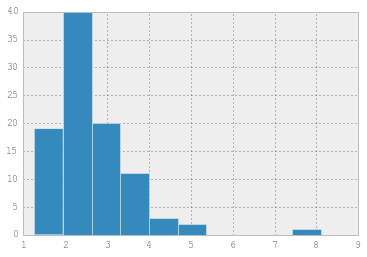

Truncated

I5P4_drift
limits: 5.52765569721, -0.222743472829
truncated 8.10995671656 to 5.52765569721.


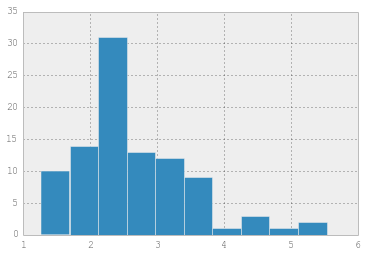

In [113]:
def truncate(s):
    z_limit = 2.97
    maxval = s.mean() + z_limit * s.std()
    minval = s.mean() - z_limit * s.std()
    
    print "\n" + s.name
    print "limits: {}, {}".format(maxval, minval)
    assert minval < s.mean() < maxval
    
    def truncval(val):
        tstr = "truncated {} to {}."
        if val > maxval:
            print tstr.format(val, maxval)
            return maxval
        elif val < minval:            
            print tstr.format(val, minval)
            if 'DPsd' in s.name:
                print "WARNING: summary data should not have to be truncated in this direction."
            return minval
        else:
            return val
    
    out = s.apply(truncval)
    
    if 'DPsd' in s.name:
        #print('checking...')
        assert out.min() >= 0
    
    return out

def test_trunc(s):
    print "Original"
    s.hist()
    plt.show()
    print "Truncated"
    truncate(s).hist()
    plt.show()
    
    
test_trunc(df_isip.I5P4_drift)



In [114]:
drifts = concat_matches(df_isip, 'P4_drift$|local$').apply(truncate)
drifts.head(3)


I5P4_local
limits: 4.90761157606, 0.755692091143

I5P4_local
limits: 4.90761157606, 0.755692091143

I8P4_local
limits: 5.29598227358, 0.470629963811
truncated 6.55088307793 to 5.29598227358.

I8P4_drift
limits: 6.87780682384, -0.545362091766
truncated 8.26350638952 to 6.87780682384.
truncated 7.3133516044 to 6.87780682384.

I5P4_drift
limits: 5.52765569721, -0.222743472829
truncated 8.10995671656 to 5.52765569721.

I8L2_local
limits: 6.58549348051, 0.562338273468
truncated 9.0214050605 to 6.58549348051.

I5L2_local
limits: 6.29774676336, 0.891217901061
truncated 6.41196525963 to 6.29774676336.


,I5P4_local,I8P4_local,I8P4_drift,I5P4_drift,I8L2_local,I5L2_local
015,2.918599,3.871535,5.361354,3.622814,4.633893,3.668177
016,2.692996,2.975526,2.148091,2.134364,3.450640,3.682978
017,2.764646,3.093386,3.853557,2.614372,3.821327,3.654972


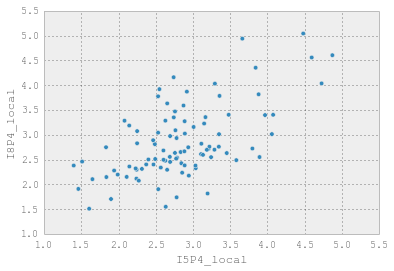

In [115]:
drifts.plot(kind='scatter', x=0,y=1)

#Interesting issue with p. 55 (the outlier on IP54_drift).
# It appears legitimate: in general the local variation is very
# small-- but there's a lot of variability, because the subject
# drifted way down to around 400ms, then jumped up to around 550
# immediately-- so there were only a couple of intervals where
# there was a big change from one interval to the next.
# especially if smoothing across four intervals.....

In [116]:
df_isip_out = pd.DataFrame(index = df_isip.index)

for c in df_isip.columns:
    if 'ints_count' in c: 
        df_isip_out[c] = df_isip[c]
    else:
        df_isip_out[c + '_trunc'] = truncate(df_isip[c])
    #del df_isip[c]


I5P4_local
limits: 4.90761157606, 0.755692091143

I8P4_local
limits: 5.29598227358, 0.470629963811
truncated 6.55088307793 to 5.29598227358.

I8P4_drift
limits: 6.87780682384, -0.545362091766
truncated 8.26350638952 to 6.87780682384.
truncated 7.3133516044 to 6.87780682384.

I5P4_drift
limits: 5.52765569721, -0.222743472829
truncated 8.10995671656 to 5.52765569721.

I8L2_local
limits: 6.58549348051, 0.562338273468
truncated 9.0214050605 to 6.58549348051.

I5L2_local
limits: 6.29774676336, 0.891217901061
truncated 6.41196525963 to 6.29774676336.

I8L2_drift
limits: 6.38719154181, -1.72402557872
truncated 7.87241198138 to 6.38719154181.
truncated 7.06373220524 to 6.38719154181.

I5L2_drift
limits: 5.13409149892, -1.67860799714
truncated 8.00023059382 to 5.13409149892.

I8P4_driftperc
limits: 0.85972585298, -0.0681702614708
truncated 1.03293829869 to 0.85972585298.
truncated 0.914168950551 to 0.85972585298.

I8P4_localperc
limits: 0.661997784197, 0.0588287454764
truncated 0.818860384741 

In [117]:
df_isip_out.T

,015,016,017,018,019,020,021,022,024,025,...,112,113,114,115,116,117,118,119,120,121
I5P4_local_trunc,2.918599,2.692996,2.764646,2.080451,1.397983,3.357435,3.454273,2.634599,2.834259,2.568266,...,2.629085,1.898820,4.873864,2.944964,2.272517,2.884701,3.168178,1.649012,2.400801,2.143469
I8P4_local_trunc,3.871535,2.975526,3.093386,3.284952,2.381819,3.785594,2.633204,1.550475,2.653945,2.340668,...,3.286044,1.706451,4.606419,2.177921,2.076461,2.668836,3.357831,2.107230,2.504026,3.187984
I8P4_drift_trunc,5.361354,2.148091,3.853557,2.249890,2.243927,4.145644,4.128266,2.268349,3.064198,4.878173,...,4.578238,3.133905,3.512176,1.844496,1.585251,3.120648,2.771240,1.874337,2.308642,3.452782
I5P4_drift_trunc,3.622814,2.134364,2.614372,1.649681,1.262769,3.145559,2.873748,2.029501,2.445649,3.253087,...,4.305536,1.431661,3.896161,2.387312,1.767129,3.003352,3.208083,1.540343,2.400271,2.112349
I8L2_local_trunc,4.633893,3.450640,3.821327,4.219624,3.002175,4.632072,3.191604,2.155060,3.318396,2.821277,...,4.000088,2.019105,4.907391,2.770480,2.900587,3.620502,4.091578,2.564399,3.293310,4.138898
I5L2_local_trunc,3.668177,3.682978,3.654972,2.455875,1.859199,4.017225,4.294289,3.458614,3.633339,3.150296,...,3.028811,2.350576,6.159270,3.805219,3.103455,3.341830,3.927692,1.882107,3.212816,2.759899
I8L2_drift_trunc,4.718045,1.249453,3.133114,NaN,1.302005,3.171907,3.713490,1.704434,2.328300,4.616893,...,3.969590,2.942201,3.077659,0.685526,NaN,1.937290,1.487880,1.173633,0.868382,2.225864
I5L2_drift_trunc,2.861377,NaN,1.058009,1.009157,0.303845,2.242502,1.322690,NaN,0.901708,2.693363,...,4.034357,0.360505,0.999005,NaN,NaN,2.484712,2.214132,1.244817,1.096796,1.199764
I8P4_ints_count,134.000000,112.000000,109.000000,114.000000,116.000000,111.000000,121.000000,109.000000,124.000000,105.000000,...,119.000000,114.000000,117.000000,119.000000,113.000000,78.000000,109.000000,111.000000,121.000000,105.000000
I5P4_ints_count,118.000000,107.000000,113.000000,117.000000,116.000000,108.000000,117.000000,118.000000,115.000000,106.000000,...,113.000000,115.000000,117.000000,111.000000,113.000000,108.000000,113.000000,108.000000,120.000000,115.000000


In [120]:
#list(match('DPm$|DPsd$'))
match('DP').T

,015,016,017,018,019,020,021,022,024,025,...,112,113,114,115,116,117,118,119,120,121
SMSR_iso5t1_DPm,-3.202915,-2.840413,-2.290274,-3.022502,-0.588655,-10.975295,-3.609441,-1.953836,-5.568016,-5.484477,...,-10.934370,-0.918811,-1.107983,-0.594511,-0.838101,-7.211448,-3.449031,-0.357402,-5.634339,-4.897263
SMSR_iso5t1_DPsd,8.582088,3.423481,3.607109,3.291210,2.583675,7.004012,4.608983,3.167766,3.170995,3.186261,...,6.123362,2.799212,4.586392,4.075651,2.487950,5.184207,5.405130,2.827062,5.538719,4.245075
SMSR_iso5t1_DPct,109.000000,116.000000,117.000000,116.000000,116.000000,117.000000,116.000000,114.000000,116.000000,110.000000,...,114.000000,115.000000,113.000000,112.000000,113.000000,114.000000,114.000000,114.000000,98.000000,114.000000
SMSR_iso8t1_DPm,-3.198754,-2.827224,-13.311147,-0.553203,-2.327200,-3.092538,-1.458121,0.968610,-2.741571,0.354671,...,-5.737524,0.205687,-0.826352,-2.226755,-1.372491,-1.247007,1.162443,-0.060845,-9.056157,-3.304496
SMSR_iso8t1_DPsd,7.944039,2.964738,9.624027,5.005393,2.431597,6.505625,4.433459,2.268350,4.452189,4.964179,...,8.144077,2.344456,6.235354,3.659721,2.334648,5.438937,3.613148,2.767637,4.298762,5.691151
SMSR_iso8t1_DPct,84.000000,104.000000,103.000000,106.000000,107.000000,101.000000,106.000000,104.000000,107.000000,103.000000,...,98.000000,104.000000,104.000000,106.000000,106.000000,103.000000,106.000000,104.000000,102.000000,105.000000
SMSR_iso5t2_DPm,-7.320309,-0.609046,-2.155283,-2.628721,-0.035660,-3.025222,-5.794925,-1.195840,-1.939757,0.793761,...,-10.848408,1.998485,-2.249983,-0.615855,-2.109468,-10.922451,-1.735612,1.315051,-11.177051,-7.462378
SMSR_iso5t2_DPsd,8.438450,3.522687,3.871627,3.373599,2.612512,7.021192,5.208270,3.488723,3.281671,5.276439,...,5.511892,2.801852,6.319350,4.716004,3.143240,4.653159,4.076174,3.167036,5.855743,4.506521
SMSR_iso5t2_DPct,102.000000,115.000000,113.000000,116.000000,117.000000,112.000000,116.000000,117.000000,116.000000,98.000000,...,114.000000,113.000000,109.000000,116.000000,117.000000,114.000000,114.000000,116.000000,114.000000,110.000000
SMSR_iso8t2_DPm,NaN,-4.064043,-4.258572,-0.759809,-1.704668,-1.823981,-1.913083,0.890989,-2.384110,0.150065,...,-1.732022,-0.082369,-6.790021,-1.854593,-1.226942,-3.161301,0.728819,-1.877539,-4.290588,-5.760608


In [121]:
df_sms = match('DP')

df_sms_out = pd.DataFrame(index = df_sms.index)

for c in df_sms.columns:    
    trimname = 's_' + c[5:]    
    if ("DPct" in c) or ("DPm" in c):
        df_sms_out[trimname] = df_sms[c]
    else:
        df_sms_out[trimname + '_trunc'] = truncate(df_sms[c])
    
df_sms_out.T


SMSR_iso5t1_DPsd
limits: 8.60087044757, 0.203275967148
truncated 10.6900950028 to 8.60087044757.
truncated 9.63481950073 to 8.60087044757.

SMSR_iso8t1_DPsd
limits: 9.87651971902, -0.763594860008

SMSR_iso5t2_DPsd
limits: 10.3558807623, -0.608126417552
truncated 11.8612907326 to 10.3558807623.
truncated 13.5791256854 to 10.3558807623.

SMSR_iso8t2_DPsd
limits: 9.59878522787, -0.712988554483
truncated 11.8655977545 to 9.59878522787.

SMSR_lin5t_DPsd
limits: 10.8070076853, 0.158185111673
truncated 11.8635409538 to 10.8070076853.

SMSR_lin8t_DPsd
limits: 10.0280231673, 0.294474921876
truncated 11.0493026542 to 10.0280231673.
truncated 11.0265619805 to 10.0280231673.

SMSR_phase5t_DPsd
limits: 16.7535407837, -2.54631807882
truncated 18.2862100575 to 16.7535407837.
truncated 27.5098384048 to 16.7535407837.
truncated 17.0772452267 to 16.7535407837.

SMSR_phase8t_DPsd
limits: 25.0649109419, -9.78174786142
truncated 30.2924106841 to 25.0649109419.
truncated 29.3655735002 to 25.0649109419.
tru

,015,016,017,018,019,020,021,022,024,025,...,112,113,114,115,116,117,118,119,120,121
s_iso5t1_DPm,-3.202915,-2.840413,-2.290274,-3.022502,-0.588655,-10.975295,-3.609441,-1.953836,-5.568016,-5.484477,...,-10.934370,-0.918811,-1.107983,-0.594511,-0.838101,-7.211448,-3.449031,-0.357402,-5.634339,-4.897263
s_iso5t1_DPsd_trunc,8.582088,3.423481,3.607109,3.291210,2.583675,7.004012,4.608983,3.167766,3.170995,3.186261,...,6.123362,2.799212,4.586392,4.075651,2.487950,5.184207,5.405130,2.827062,5.538719,4.245075
s_iso5t1_DPct,109.000000,116.000000,117.000000,116.000000,116.000000,117.000000,116.000000,114.000000,116.000000,110.000000,...,114.000000,115.000000,113.000000,112.000000,113.000000,114.000000,114.000000,114.000000,98.000000,114.000000
s_iso8t1_DPm,-3.198754,-2.827224,-13.311147,-0.553203,-2.327200,-3.092538,-1.458121,0.968610,-2.741571,0.354671,...,-5.737524,0.205687,-0.826352,-2.226755,-1.372491,-1.247007,1.162443,-0.060845,-9.056157,-3.304496
s_iso8t1_DPsd_trunc,7.944039,2.964738,9.624027,5.005393,2.431597,6.505625,4.433459,2.268350,4.452189,4.964179,...,8.144077,2.344456,6.235354,3.659721,2.334648,5.438937,3.613148,2.767637,4.298762,5.691151
s_iso8t1_DPct,84.000000,104.000000,103.000000,106.000000,107.000000,101.000000,106.000000,104.000000,107.000000,103.000000,...,98.000000,104.000000,104.000000,106.000000,106.000000,103.000000,106.000000,104.000000,102.000000,105.000000
s_iso5t2_DPm,-7.320309,-0.609046,-2.155283,-2.628721,-0.035660,-3.025222,-5.794925,-1.195840,-1.939757,0.793761,...,-10.848408,1.998485,-2.249983,-0.615855,-2.109468,-10.922451,-1.735612,1.315051,-11.177051,-7.462378
s_iso5t2_DPsd_trunc,8.438450,3.522687,3.871627,3.373599,2.612512,7.021192,5.208270,3.488723,3.281671,5.276439,...,5.511892,2.801852,6.319350,4.716004,3.143240,4.653159,4.076174,3.167036,5.855743,4.506521
s_iso5t2_DPct,102.000000,115.000000,113.000000,116.000000,117.000000,112.000000,116.000000,117.000000,116.000000,98.000000,...,114.000000,113.000000,109.000000,116.000000,117.000000,114.000000,114.000000,116.000000,114.000000,110.000000
s_iso8t2_DPm,NaN,-4.064043,-4.258572,-0.759809,-1.704668,-1.823981,-1.913083,0.890989,-2.384110,0.150065,...,-1.732022,-0.082369,-6.790021,-1.854593,-1.226942,-3.161301,0.728819,-1.877539,-4.290588,-5.760608


In [122]:
df_nonzero_transformed = match('nonzero')
df_log_transformed = match('ln1p')

isip_using = ['I5P4_local_trunc',
              'I8P4_local_trunc',
              'I5P4_drift_trunc',
              'I8P4_drift_trunc',]

df_log_isips = np.log(df_isip_out[isip_using])
df_log_isips.columns = [c + "_log" for c in df_log_isips.columns]


to_log = [c for c in df_sms_out if "DPsd" in c]
df_log_sms = np.log(df_sms_out[to_log])
df_log_sms.columns = [c + "_log" for c in df_log_sms.columns]

df_log_sms

,s_iso5t1_DPsd_trunc_log,s_iso8t1_DPsd_trunc_log,s_iso5t2_DPsd_trunc_log,s_iso8t2_DPsd_trunc_log,s_lin5t_DPsd_trunc_log,s_lin8t_DPsd_trunc_log,s_phase5t_DPsd_trunc_log,s_phase8t_DPsd_trunc_log,s_iso5j_DPsd_trunc_log,s_iso8j_DPsd_trunc_log,...,s_phase5t_nrm_DPsd_trunc_log,s_phase8t_nrm_DPsd_trunc_log,s_phase5j_nrm_DPsd_trunc_log,s_phase8j_nrm_DPsd_trunc_log,s_lint_610690_DPsd_trunc_log,s_linj_610690_DPsd_trunc_log,s_lint_700800_DPsd_trunc_log,s_lint_500600_DPsd_trunc_log,s_linj_700800_DPsd_trunc_log,s_linj_500600_DPsd_trunc_log
015,2.149677,2.072422,2.132799,NaN,NaN,2.305383,2.818610,3.221469,1.468862,NaN,...,NaN,NaN,2.285546,1.912401,2.618486,2.378515,NaN,NaN,2.121631,2.268092
016,1.230658,1.086789,1.259224,1.131855,1.336055,1.334307,1.533899,1.440647,1.644933,1.692863,...,1.237526,0.987879,1.542395,1.356415,1.294040,1.901060,1.432330,1.325320,1.733171,1.918965
017,1.282907,2.264263,1.353675,1.621979,1.601238,1.791392,1.808526,1.917085,1.660185,2.137184,...,1.623261,2.026634,2.091082,1.966651,1.833350,2.696919,1.837178,1.959291,2.122493,2.666476
018,1.191255,1.610516,1.215980,1.717185,1.586875,1.519132,1.794290,1.947621,1.931067,1.772214,...,1.498037,1.542243,1.861343,1.616563,1.562305,NaN,1.790320,1.467634,NaN,NaN
019,0.949213,0.888548,0.960312,1.224957,1.532127,1.506308,1.771647,1.344109,1.883450,1.733544,...,1.304594,0.976403,2.153080,2.202028,1.618251,2.555784,1.568773,1.232024,NaN,2.256561
020,1.946483,1.872667,1.948933,1.854551,2.002822,1.742977,2.178424,2.057176,1.851579,1.819399,...,1.940384,1.786897,1.998019,2.200341,2.073547,1.995418,1.864525,1.809923,2.012866,2.430195
021,1.528007,1.489180,1.650248,1.474399,1.746812,1.595103,1.728366,1.698249,1.738222,1.707575,...,1.624750,1.473877,1.866872,1.741272,1.842086,2.311555,1.675000,2.003263,2.024557,2.329250
022,1.153027,0.819053,1.249536,0.850104,1.270195,1.167324,1.713754,1.711628,1.650584,1.755917,...,1.325582,0.813877,2.025180,1.639814,1.336419,2.063487,1.260027,1.308259,1.771447,2.407362
024,1.154046,1.493396,1.188353,1.427988,1.511344,1.651714,1.871108,1.671339,1.848477,1.804228,...,1.399705,1.606961,1.754322,1.825810,1.479158,2.042926,1.668247,1.575855,1.887242,2.133818
025,1.158848,1.602248,1.663251,1.486620,1.842359,1.665542,2.194410,1.918771,1.707418,1.908284,...,NaN,NaN,2.217726,1.865401,1.714718,2.017316,1.784602,1.832228,1.898132,1.911576


In [123]:
df_to_analyze = pd.concat(axis=1, 
                          objs=[df_scales, 
                                df_constructed,
                                df_log_transformed,
                                df_nonzero_transformed,
                                df_isip_out,
                                df_log_isips,
                                df_sms_out,
                                df_log_sms,
                                ])

In [124]:
#concat_matches(df_to_analyze, 'I?P4_local_trunc|I?P4_drift_trunc').T
concat_matches(df_to_analyze, 'log$').T

,015,016,017,018,019,020,021,022,024,025,...,112,113,114,115,116,117,118,119,120,121
I5P4_local_trunc_log,1.071104,0.990654,1.016912,0.732585,0.335030,1.211177,1.239612,0.968731,1.041781,0.943231,...,0.966636,0.641233,1.583887,1.080096,0.820888,1.059421,1.153157,0.500176,0.875803,0.762425
I8P4_local_trunc_log,1.353651,1.090421,1.129266,1.189352,0.867865,1.331203,0.968201,0.438561,0.976047,0.850436,...,1.189684,0.534416,1.527451,0.778371,0.730665,0.981642,1.211295,0.745374,0.917900,1.159389
I5P4_drift_trunc_log,1.287251,0.758169,0.961024,0.500582,0.233307,1.145992,1.055617,0.707790,0.894311,1.179604,...,1.459902,0.358835,1.359992,0.870168,0.569356,1.099729,1.165674,0.432005,0.875582,0.747801
I8P4_drift_trunc_log,1.679217,0.764580,1.348997,0.810881,0.808227,1.422058,1.417857,0.819052,1.119786,1.584771,...,1.521314,1.142280,1.256236,0.612206,0.460743,1.138041,1.019295,0.628255,0.836660,1.239180
s_iso5t1_DPsd_trunc_log,2.149677,1.230658,1.282907,1.191255,0.949213,1.946483,1.528007,1.153027,1.154046,1.158848,...,1.812111,1.029338,1.523094,1.405030,0.911459,1.645617,1.687348,1.039238,1.711763,1.445759
s_iso8t1_DPsd_trunc_log,2.072422,1.086789,2.264263,1.610516,0.888548,1.872667,1.489180,0.819053,1.493396,1.602248,...,2.097291,0.852053,1.830235,1.297387,0.847861,1.693584,1.284579,1.017994,1.458327,1.738912
s_iso5t2_DPsd_trunc_log,2.132799,1.259224,1.353675,1.215980,0.960312,1.948933,1.650248,1.249536,1.188353,1.663251,...,1.706908,1.030281,1.843616,1.550962,1.145254,1.537546,1.405159,1.152796,1.767423,1.505525
s_iso8t2_DPsd_trunc_log,NaN,1.131855,1.621979,1.717185,1.224957,1.854551,1.474399,0.850104,1.427988,1.486620,...,1.764540,1.019723,1.804565,1.256179,0.822493,1.518399,1.074398,1.167698,1.312072,1.790040
s_lin5t_DPsd_trunc_log,NaN,1.336055,1.601238,1.586875,1.532127,2.002822,1.746812,1.270195,1.511344,1.842359,...,2.380195,1.240751,2.003874,1.490492,1.163007,1.884450,1.635103,1.436168,1.753264,1.995672
s_lin8t_DPsd_trunc_log,2.305383,1.334307,1.791392,1.519132,1.506308,1.742977,1.595103,1.167324,1.651714,1.665542,...,1.983140,1.062247,1.871916,1.378390,1.198713,1.933333,1.592535,1.246329,1.665642,1.663364


In [125]:
# TO DO:
# Calculate z scores for each DPsd
# Calculate the mean of the two z scores for each 500/800 pairing
# See if the value of this still correlates with the 500-first/800-first order variable


remove_unused = [c for c in df_to_analyze.columns 
                 if (   '_psk_' in c 
                     or 's_lint_' in c 
                     or 's_linj_' in c)]
for c in remove_unused:
    del df_to_analyze[c]
    

to_combine = concat_matches(df_to_analyze, 'DPsd_trunc')
#for p in list(to_combine.columns):
    #print(p)

for c in ['I5P4_local_trunc',
          'I8P4_local_trunc',
          'I5P4_drift_trunc',
          'I8P4_drift_trunc',]:
    to_combine[c] = df_to_analyze[c]
    
    
z_to_combine = (to_combine.mean() - to_combine) / to_combine.std()
#proper column-wise z score output was confirmed


df_to_analyze['IP4_local_trunc_mz58'] = (  z_to_combine['I5P4_local_trunc'] 
                                          + z_to_combine['I8P4_local_trunc']) / 2

df_to_analyze['IP4_drift_trunc_mz58'] = (  z_to_combine['I5P4_drift_trunc'] 
                                          + z_to_combine['I8P4_drift_trunc']) / 2


df_to_analyze['iso_j_DPsd_trunc_mz58'] = (  z_to_combine['s_iso5j_DPsd_trunc'] 
                                          + z_to_combine['s_iso8j_DPsd_trunc']) / 2

df_to_analyze['iso_t1_DPsd_trunc_mz58'] = (  z_to_combine['s_iso5t1_DPsd_trunc'] 
                                           + z_to_combine['s_iso8t1_DPsd_trunc']) / 2

df_to_analyze['iso_t2_DPsd_trunc_mz58'] = (  z_to_combine['s_iso5t2_DPsd_trunc'] 
                                           + z_to_combine['s_iso8t2_DPsd_trunc']) / 2

df_to_analyze['lin_j_DPsd_trunc_mz58'] = (  z_to_combine['s_lin5j_DPsd_trunc'] 
                                          + z_to_combine['s_lin8j_DPsd_trunc']) / 2

df_to_analyze['lin_t_DPsd_trunc_mz58'] = (  z_to_combine['s_lin5t_DPsd_trunc'] 
                                          + z_to_combine['s_lin8t_DPsd_trunc']) / 2

df_to_analyze['phase_j_nrm_DPsd_trunc_mz58'] = (  z_to_combine['s_phase5j_nrm_DPsd_trunc'] 
                                                + z_to_combine['s_phase8j_nrm_DPsd_trunc']) / 2

df_to_analyze['phase_j_psr_DPsd_trunc_mz58'] = (  z_to_combine['s_phase5j_psr_DPsd_trunc'] 
                                                + z_to_combine['s_phase8j_psr_DPsd_trunc']) / 2

df_to_analyze['phase_t_nrm_DPsd_trunc_mz58'] = (  z_to_combine['s_phase5t_nrm_DPsd_trunc'] 
                                                + z_to_combine['s_phase8t_nrm_DPsd_trunc']) / 2

df_to_analyze['phase_t_psr_DPsd_trunc_mz58'] = (  z_to_combine['s_phase5t_psr_DPsd_trunc'] 
                                                + z_to_combine['s_phase8t_psr_DPsd_trunc']) / 2
#null values propagate to new measure (confirmed)

#df_to_analyze['IP4_drift_trunc_mz58'][20:]

In [126]:
update = {'measure': 'subset_to_spss',
          'updated': '2014-10-15c'}

pfilenames = "c:/db_pickles/pickle - dfo-{measure} - {updated}.{ext}"

output_file_csv = pfilenames.format(measure=update['measure'], 
                                    updated=update['updated'], 
                                    ext="csv")

output_file_pickle = pfilenames.format(measure=update['measure'], 
                                    updated=update['updated'], 
                                    ext="pickle")

df_to_analyze.to_pickle(output_file_pickle)

dfo_to_analyze_missing_coded = df_to_analyze.replace(np.nan, '77777')
dfo_to_analyze_missing_coded.to_csv(output_file_csv)


print("\nSAVED: {}\n".format(output_file_csv))

df_to_analyze.T


SAVED: c:/db_pickles/pickle - dfo-subset_to_spss - 2014-10-15c.csv



,015,016,017,018,019,020,021,022,024,025,...,112,113,114,115,116,117,118,119,120,121
SCAL_order_500ms_first,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
SCAL_sex_femalezero,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
SCAL_orders_iso,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,2.000000
SCAL_orders_phase,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
SCAL_orders_linear,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000
SCAL_calc_wasivocab_tscore,49.000000,78.000000,55.000000,50.000000,55.000000,57.000000,53.000000,57.000000,44.000000,47.000000,...,39.000000,44.000000,63.000000,74.000000,52.000000,46.000000,57.000000,51.000000,43.000000,48.000000
SCAL_calc_wasimatrix_tscore,38.000000,53.000000,54.000000,53.000000,55.000000,49.000000,42.000000,46.000000,55.000000,48.000000,...,46.000000,49.000000,62.000000,53.000000,71.000000,49.000000,52.000000,55.000000,57.000000,49.000000
SCAL_calc_wasi_tscore_total,87.000000,131.000000,109.000000,103.000000,110.000000,106.000000,95.000000,103.000000,99.000000,95.000000,...,85.000000,93.000000,125.000000,127.000000,123.000000,95.000000,109.000000,106.000000,100.000000,97.000000
SCAL_calc_fsiq2,89.000000,127.000000,108.000000,102.000000,109.000000,105.000000,95.000000,102.000000,99.000000,95.000000,...,87.000000,94.000000,122.000000,123.000000,120.000000,95.000000,108.000000,105.000000,100.000000,97.000000
SCAL_calc_bfi_extraversion,2.125000,4.000000,2.750000,3.000000,4.500000,1.750000,2.125000,3.250000,2.500000,2.625000,...,3.875000,4.500000,3.000000,3.125000,4.875000,4.375000,4.375000,4.250000,3.000000,3.250000


In [22]:
df_to_analyze.count().to_csv('non-null counts 2014-10-15b.csv')

In [95]:
dfa = df_to_analyze

for p in concat_matches(df_to_analyze, '_log'): print p

I5P4_local_trunc_log
I8P4_local_trunc_log
I5P4_drift_trunc_log
I8P4_drift_trunc_log
s_iso5t1_DPsd_trunc_log
s_iso8t1_DPsd_trunc_log
s_iso5t2_DPsd_trunc_log
s_iso8t2_DPsd_trunc_log
s_lin5t_DPsd_trunc_log
s_lin8t_DPsd_trunc_log
s_phase5t_DPsd_trunc_log
s_phase8t_DPsd_trunc_log
s_iso5j_DPsd_trunc_log
s_iso8j_DPsd_trunc_log
s_lin5j_DPsd_trunc_log
s_lin8j_DPsd_trunc_log
s_phase5j_DPsd_trunc_log
s_phase8j_DPsd_trunc_log
s_phase8j_psr_DPsd_trunc_log
s_phase8t_psr_DPsd_trunc_log
s_phase5j_psr_DPsd_trunc_log
s_phase5t_psr_DPsd_trunc_log
s_phase5t_nrm_DPsd_trunc_log
s_phase8t_nrm_DPsd_trunc_log
s_phase5j_nrm_DPsd_trunc_log
s_phase8j_nrm_DPsd_trunc_log


8 columns. Proceed?
('s_iso5t2_DPsd_trunc_log', 's_iso8t2_DPsd_trunc_log')


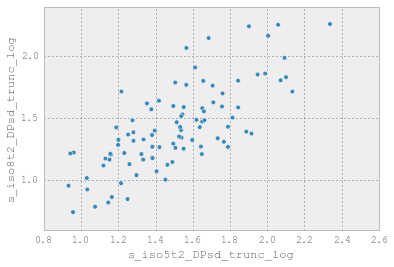

('s_iso5t2_DPsd_trunc_log', 's_iso5j_DPsd_trunc_log')


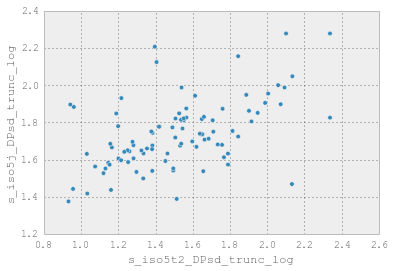

('s_iso5t2_DPsd_trunc_log', 's_iso8j_DPsd_trunc_log')


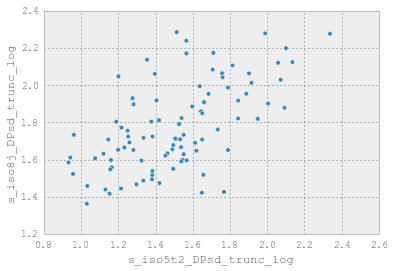

('s_iso5t2_DPsd_trunc_log', 's_phase8j_psr_DPsd_trunc_log')


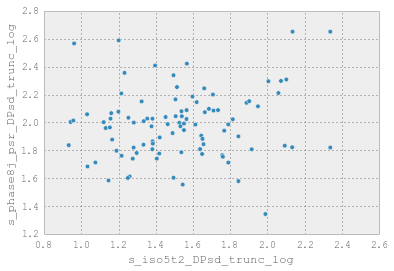

('s_iso5t2_DPsd_trunc_log', 's_phase8t_psr_DPsd_trunc_log')


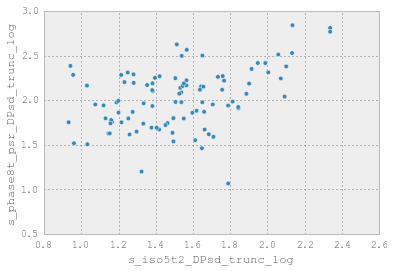

('s_iso5t2_DPsd_trunc_log', 's_phase5j_psr_DPsd_trunc_log')


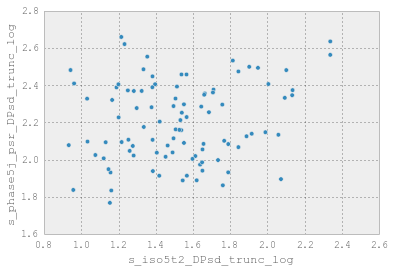

('s_iso5t2_DPsd_trunc_log', 's_phase5t_psr_DPsd_trunc_log')


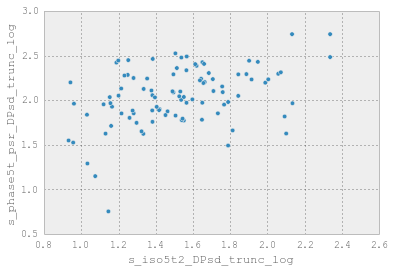

('s_iso8t2_DPsd_trunc_log', 's_iso5j_DPsd_trunc_log')


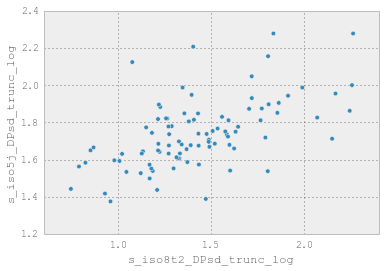

('s_iso8t2_DPsd_trunc_log', 's_iso8j_DPsd_trunc_log')


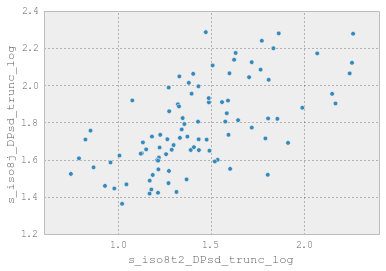

('s_iso8t2_DPsd_trunc_log', 's_phase8j_psr_DPsd_trunc_log')


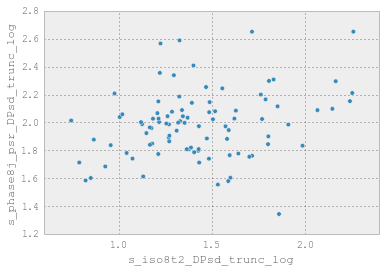

('s_iso8t2_DPsd_trunc_log', 's_phase8t_psr_DPsd_trunc_log')


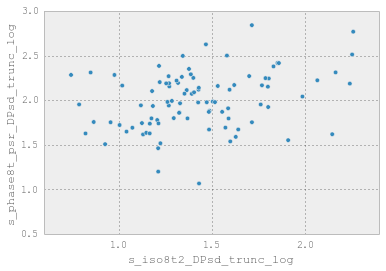

('s_iso8t2_DPsd_trunc_log', 's_phase5j_psr_DPsd_trunc_log')


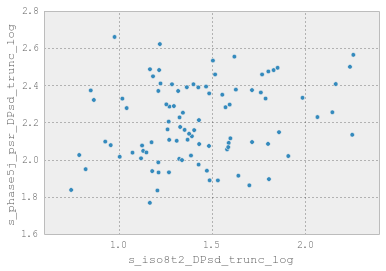

('s_iso8t2_DPsd_trunc_log', 's_phase5t_psr_DPsd_trunc_log')


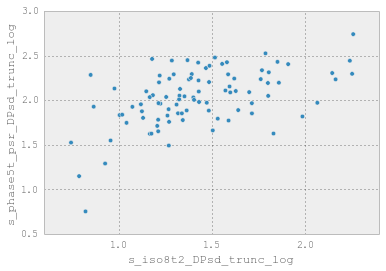

('s_iso5j_DPsd_trunc_log', 's_iso8j_DPsd_trunc_log')


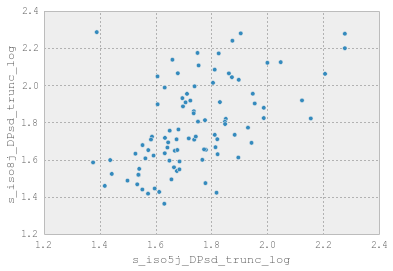

('s_iso5j_DPsd_trunc_log', 's_phase8j_psr_DPsd_trunc_log')


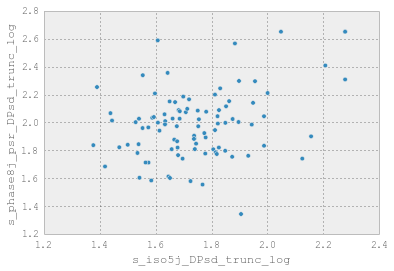

('s_iso5j_DPsd_trunc_log', 's_phase8t_psr_DPsd_trunc_log')


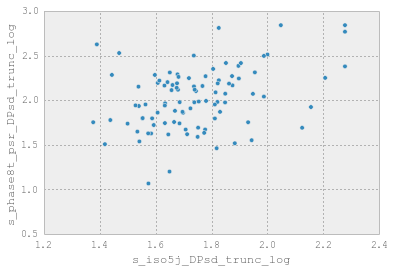

('s_iso5j_DPsd_trunc_log', 's_phase5j_psr_DPsd_trunc_log')


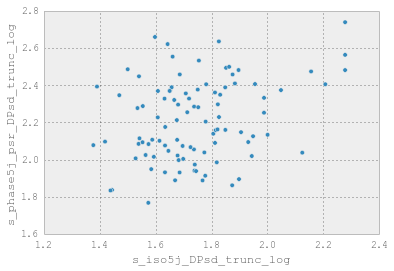

('s_iso5j_DPsd_trunc_log', 's_phase5t_psr_DPsd_trunc_log')


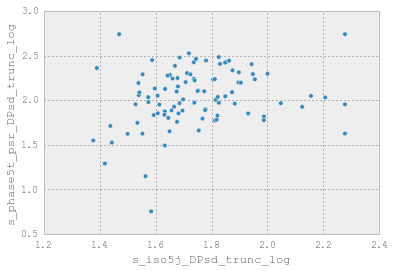

('s_iso8j_DPsd_trunc_log', 's_phase8j_psr_DPsd_trunc_log')


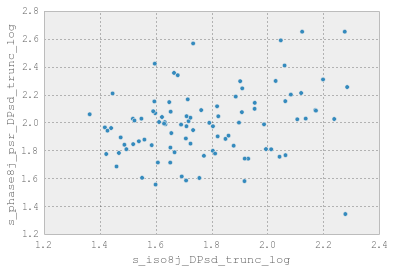

('s_iso8j_DPsd_trunc_log', 's_phase8t_psr_DPsd_trunc_log')


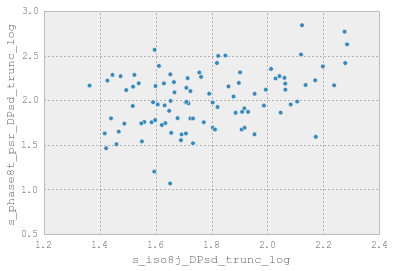

('s_iso8j_DPsd_trunc_log', 's_phase5j_psr_DPsd_trunc_log')


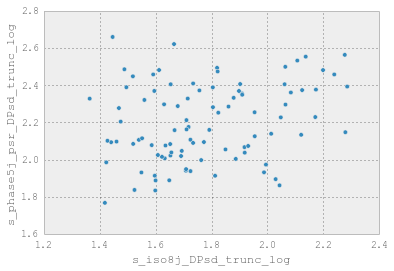

('s_iso8j_DPsd_trunc_log', 's_phase5t_psr_DPsd_trunc_log')


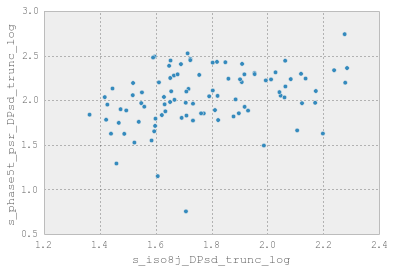

('s_phase8j_psr_DPsd_trunc_log', 's_phase8t_psr_DPsd_trunc_log')


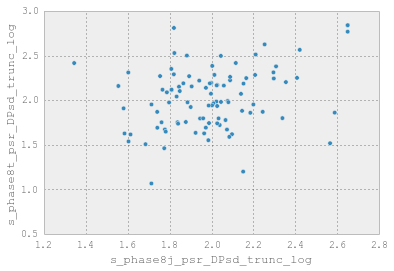

('s_phase8j_psr_DPsd_trunc_log', 's_phase5j_psr_DPsd_trunc_log')


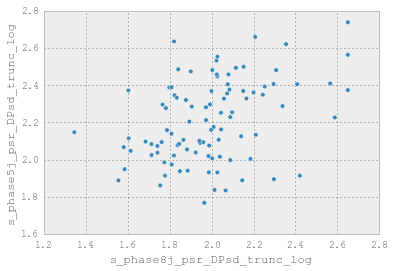

('s_phase8j_psr_DPsd_trunc_log', 's_phase5t_psr_DPsd_trunc_log')


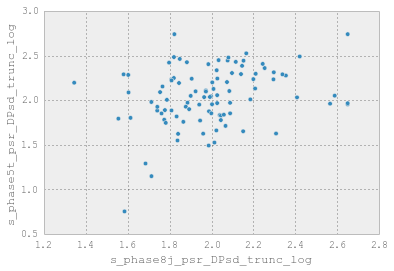

('s_phase8t_psr_DPsd_trunc_log', 's_phase5j_psr_DPsd_trunc_log')


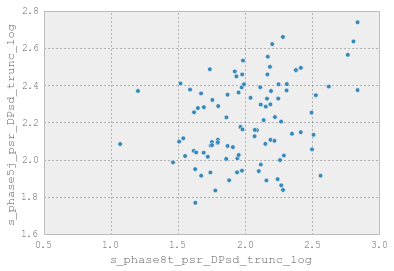

('s_phase8t_psr_DPsd_trunc_log', 's_phase5t_psr_DPsd_trunc_log')


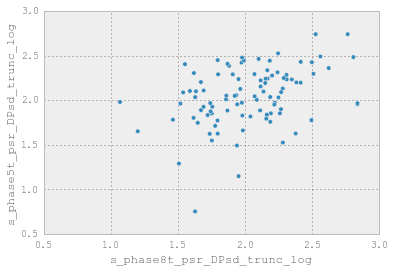

('s_phase5j_psr_DPsd_trunc_log', 's_phase5t_psr_DPsd_trunc_log')


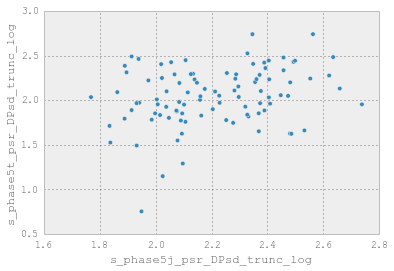

In [103]:
paste_1 = ('''
s_iso5t2_DPsd_trunc_log
s_iso8t2_DPsd_trunc_log
s_iso5j_DPsd_trunc_log
s_iso8j_DPsd_trunc_log
s_phase8j_psr_DPsd_trunc_log
s_phase8t_psr_DPsd_trunc_log
s_phase5j_psr_DPsd_trunc_log
s_phase5t_psr_DPsd_trunc_log
''')

design_1 = clean_pasted_vars(paste_1)

scatter_all(dfa[design_1])

('s_lin5t_DPsd_trunc_log', 's_lin8t_DPsd_trunc_log')


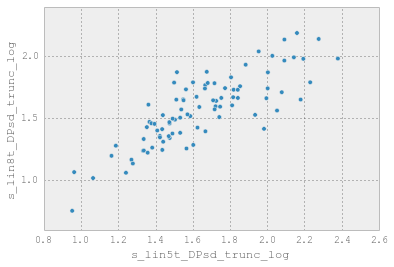

('s_lin5t_DPsd_trunc_log', 's_lin5j_DPsd_trunc_log')


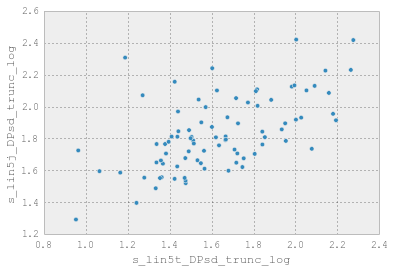

('s_lin5t_DPsd_trunc_log', 's_lin8j_DPsd_trunc_log')


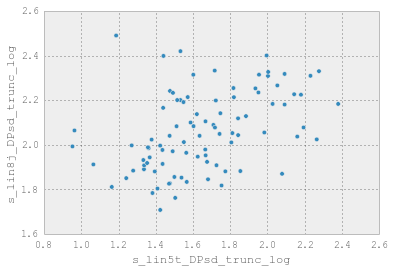

('s_lin8t_DPsd_trunc_log', 's_lin5j_DPsd_trunc_log')


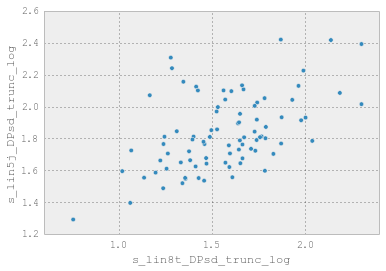

('s_lin8t_DPsd_trunc_log', 's_lin8j_DPsd_trunc_log')


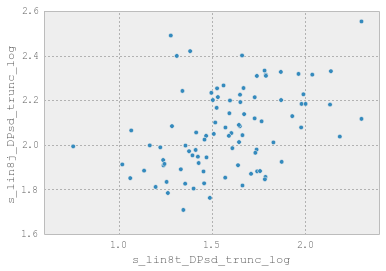

('s_lin5j_DPsd_trunc_log', 's_lin8j_DPsd_trunc_log')


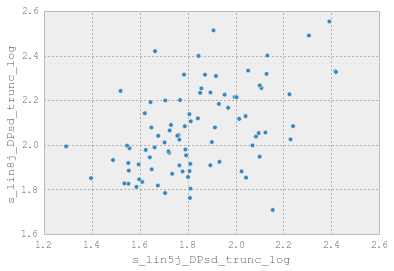

In [98]:
design_2 = clean_pasted_vars('''
s_lin5t_DPsd_trunc_log
s_lin8t_DPsd_trunc_log
s_lin5j_DPsd_trunc_log
s_lin8j_DPsd_trunc_log
''')

scatter_all(dfa[design_2])

('I5P4_local_trunc_log', 'I8P4_local_trunc_log')


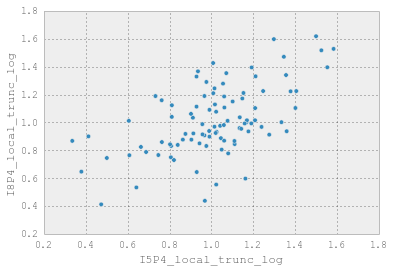

('I5P4_local_trunc_log', 'I5P4_drift_trunc_log')


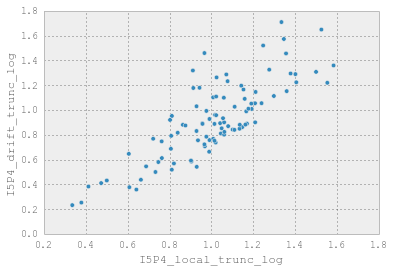

('I5P4_local_trunc_log', 'I8P4_drift_trunc_log')


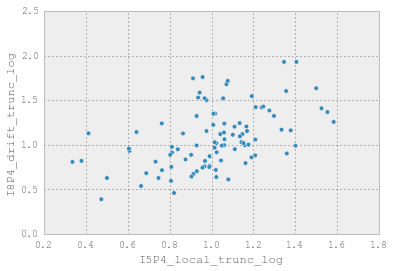

('I8P4_local_trunc_log', 'I5P4_drift_trunc_log')


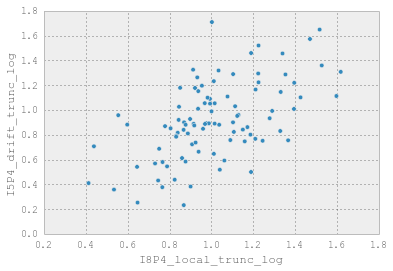

('I8P4_local_trunc_log', 'I8P4_drift_trunc_log')


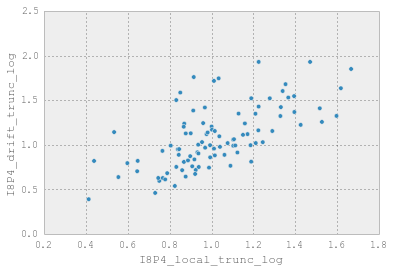

('I5P4_drift_trunc_log', 'I8P4_drift_trunc_log')


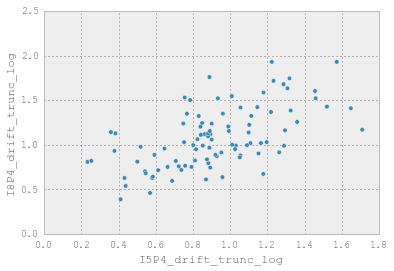

In [99]:
design_3 = clean_pasted_vars('''
I5P4_local_trunc_log
I8P4_local_trunc_log
I5P4_drift_trunc_log
I8P4_drift_trunc_log
''')

scatter_all(dfa[design_3])       

In [101]:
match('drumlevel').sort(columns='SCAL_qmusic_drumlevel').tail(20)

,SCAL_qmusic_drumlevel
055,0
057,0
121,0
053,0
052,0
051,0
054,0
048,0
049,0
063,1


In [102]:
match('instrumentlevel').sort(columns='SCAL_qmusic_instrumentlevel').median()

SCAL_qmusic_instrumentlevel    2
dtype: float64

In [207]:
def stack_rm_case(case_series):

    total_stacked_vars = 12
    caseid = case_series.name

    #caseid_repeated = [caseid] * total_stacked_vars

    #caseid_list = {}
    tasktype = {}
    targetioi = {}
    targetstim = {}

    tasktype['s_iso5t2_DPsd_trunc_log'] = 1
    tasktype['s_iso8t2_DPsd_trunc_log'] = 1
    tasktype['s_iso5j_DPsd_trunc_log'] = 1
    tasktype['s_iso8j_DPsd_trunc_log'] = 1
    tasktype['s_phase8j_psr_DPsd_trunc_log'] = 2
    tasktype['s_phase8t_psr_DPsd_trunc_log'] = 2
    tasktype['s_phase5j_psr_DPsd_trunc_log'] = 2
    tasktype['s_phase5t_psr_DPsd_trunc_log'] = 2
    tasktype['s_phase5t_nrm_DPsd_trunc_log'] = 3
    tasktype['s_phase8t_nrm_DPsd_trunc_log'] = 3
    tasktype['s_phase5j_nrm_DPsd_trunc_log'] = 3
    tasktype['s_phase8j_nrm_DPsd_trunc_log'] = 3

    tasktype['s_iso5t2_DPsd_trunc_log'] = 1
    tasktype['s_iso8t2_DPsd_trunc_log'] = 1
    tasktype['s_iso5j_DPsd_trunc_log'] = 1
    tasktype['s_iso8j_DPsd_trunc_log'] = 1
    tasktype['s_phase8j_psr_DPsd_trunc_log'] = 2
    tasktype['s_phase8t_psr_DPsd_trunc_log'] = 2
    tasktype['s_phase5j_psr_DPsd_trunc_log'] = 2
    tasktype['s_phase5t_psr_DPsd_trunc_log'] = 2
    tasktype['s_phase5t_nrm_DPsd_trunc_log'] = 3
    tasktype['s_phase8t_nrm_DPsd_trunc_log'] = 3
    tasktype['s_phase5j_nrm_DPsd_trunc_log'] = 3
    tasktype['s_phase8j_nrm_DPsd_trunc_log'] = 3

    targetioi['s_iso5t2_DPsd_trunc_log'] = 0
    targetioi['s_iso8t2_DPsd_trunc_log'] = 1
    targetioi['s_iso5j_DPsd_trunc_log'] = 0
    targetioi['s_iso8j_DPsd_trunc_log'] = 1
    targetioi['s_phase8j_psr_DPsd_trunc_log'] = 1
    targetioi['s_phase8t_psr_DPsd_trunc_log'] = 1
    targetioi['s_phase5j_psr_DPsd_trunc_log'] = 0
    targetioi['s_phase5t_psr_DPsd_trunc_log'] = 0
    targetioi['s_phase5t_nrm_DPsd_trunc_log'] = 0
    targetioi['s_phase8t_nrm_DPsd_trunc_log'] = 1
    targetioi['s_phase5j_nrm_DPsd_trunc_log'] = 0
    targetioi['s_phase8j_nrm_DPsd_trunc_log'] = 1

    targetstim['s_iso5t2_DPsd_trunc_log'] = 0
    targetstim['s_iso8t2_DPsd_trunc_log'] = 0
    targetstim['s_iso5j_DPsd_trunc_log'] = 1
    targetstim['s_iso8j_DPsd_trunc_log'] = 1
    targetstim['s_phase8j_psr_DPsd_trunc_log'] = 1
    targetstim['s_phase8t_psr_DPsd_trunc_log'] = 0
    targetstim['s_phase5j_psr_DPsd_trunc_log'] = 1
    targetstim['s_phase5t_psr_DPsd_trunc_log'] = 0
    targetstim['s_phase5t_nrm_DPsd_trunc_log'] = 0
    targetstim['s_phase8t_nrm_DPsd_trunc_log'] = 0
    targetstim['s_phase5j_nrm_DPsd_trunc_log'] = 1
    targetstim['s_phase8j_nrm_DPsd_trunc_log'] = 1

    caseid_repeated = {k: caseid for k in tasktype.keys()}

    stackedvars = pd.DataFrame({'caseid': caseid_repeated,
                                'casedata': acase,
                                'tasktype': tasktype,
                                'targetioi': targetioi,
                                'targetstim': targetstim,
                                },
                               #index = acase.T.index
                               )

    
    stackedvars.index.name='original_varname'

    case_out = stackedvars.reset_index('original_varname')
    
    return case_out


repmeas = concat_matches(df_to_analyze, 'psr.*log|nrm.*log|iso.t2.*log|iso.j.*log')

cases = [stack_rm_case(repmeas.loc[p]) for p in repmeas.index]

stacked = pd.concat(cases, axis=0)

stacked.index = range(len(stacked))
stacked.index.name = "st_row"

stacked = stacked.reset_index('st_row')
stacked = stacked.set_index('caseid')


In [208]:
df_to_analyze['SCAL_calc_fsiq2']

015     89
016    127
017    108
018    102
019    109
020    105
021     95
022    102
024     99
025     95
026    100
027    105
028    116
029    108
030    115
...
107    108
108     96
109     97
110    122
111    118
112     87
113     94
114    122
115    123
116    120
117     95
118    108
119    105
120    100
121     97
Name: SCAL_calc_fsiq2, Length: 99, dtype: float64

In [219]:
df_to_analyze.loc['015', staticvar]

89.0

In [214]:
staticvar = 'SCAL_calc_fsiq2'


ids = sorted(set(stacked.index))


for caseid in ids:
    print(caseid)
    stacked[staticvar] = np.nan
    
    stacked.loc[caseid, staticvar] = df_to_analyze.loc[caseid, staticvar]

#slc = stacked.loc[stacked.caseid=='015']
#slc.somevarname = 'the_value'



#stacked.to_csv('stacked_test.csv')
stacked

015
016
017
018
019
020
021
022
024
025
026
027
028
029
030
032
033
034
035
036
037
038
039
040
041
043
044
046
047
048
049
051
052
053
054
055
056
057
058
059
060
061
062
063
064
065
066
067
068
069
071
072
073
074
075
076
077
078
079
080
081
082
083
084
085
086
087
089
090
091
092
093
094
095
096
097
098
099
100
101
102
103
104
105
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121


,st_row,original_varname,casedata,targetioi,targetstim,tasktype,SCAL_calc_fsiq2
caseid,,,,,,,
015,0,s_iso5j_DPsd_trunc_log,1.644933,0,1,1,NaN
015,1,s_iso5t2_DPsd_trunc_log,1.259224,0,0,1,NaN
015,2,s_iso8j_DPsd_trunc_log,1.692863,1,1,1,NaN
015,3,s_iso8t2_DPsd_trunc_log,1.131855,1,0,1,NaN
015,4,s_phase5j_nrm_DPsd_trunc_log,1.542395,0,1,3,NaN
015,5,s_phase5j_psr_DPsd_trunc_log,2.047200,0,1,2,NaN
015,6,s_phase5t_nrm_DPsd_trunc_log,1.237526,0,0,3,NaN
015,7,s_phase5t_psr_DPsd_trunc_log,1.801437,0,0,2,NaN
015,8,s_phase8j_nrm_DPsd_trunc_log,1.356415,1,1,3,NaN


In [171]:
df_to_analyze.loc[caseid, staticvar]

89.0

In [313]:
print("NULL VALUES (INCLUDING REMOVED FOR INCOMPLETE TAP SETS):\n\n")
    
for c in df_to_analyze:
    print(c)
    s = df_to_analyze[c]
    print(list(s[s.isnull()].index))
    print('')

NULL VALUES (INCLUDING REMOVED FOR INCOMPLETE TAP SETS):


SCAL_order_500ms_first
[]

SCAL_sex_femalezero
[]

SCAL_calc_wasivocab_tscore
[]

SCAL_calc_wasimatrix_tscore
['053']

SCAL_calc_wasi_tscore_total
['053']

SCAL_calc_fsiq2
['053']

SCAL_calc_bfi_extraversion
[]

SCAL_calc_bfi_agreeableness
[]

SCAL_calc_bfi_conscientiousness
[]

SCAL_calc_bfi_neuroticism
[]

SCAL_calc_bfi_openness
[]

SCAL_qmusic_dancelevel
[]

SCAL_qmusic_instrumentlevel
[]

SCAL_qmusic_drumlevel
['064']

SCAL_qmusic_behaviors_12_friendstaste
[]

SCAL_qmusic_behaviors_13_sharingint
[]

SCAL_qmusic_behaviors_14_getinterest
[]

qmusic_calc_anyhours
[]

qmusic_calc_maxskill
['064']

qmusic_calc_sumskill
['064']

qmusic_calc_socialimp
[]

SCAL_qmusic_behaviors_07_yourself_ln1p
['093']

SCAL_qmusic_behaviors_08_otherprs_ln1p
[]

SCAL_qmusic_behaviors_09_danceprv_ln1p
[]

SCAL_qmusic_dancelevel_ln1p
[]

SCAL_qmusic_singinghours_nonzero
[]

SCAL_qmusic_singingtimes_nonzero
[]

SCAL_qmusic_dancehours_nonzero
[]

SCAL_

#   After exporting CSV: looking at distributions here...

## Descriptives (into manuscript)

In [209]:
dfa = df_to_analyze

get = lambda r: (list(concat_matches(dfo, r).columns), concat_matches(dfo, r))
geta = lambda r: (list(concat_matches(df_to_analyze, r).columns), concat_matches(df_to_analyze, r))
firstcol = lambda df: df.T.iloc[0]

firstcol(match('participant_age')).describe()

count    99.000000
mean     20.939394
std       5.013895
min      18.000000
25%      19.000000
50%      20.000000
75%      21.000000
max      52.000000
dtype: float64

In [157]:
sex = firstcol(match('sex_femalezero'))
is_female = (sex==0)
is_male = (sex==1)

assert is_female[is_female==True].count() == 60
assert is_female[is_female==False].count() == 39

assert is_male[is_male==True].count() == 39
assert is_male[is_male==False].count() == 60

In [159]:
var1 = firstcol(match('participant_age'))

print ("  females")
print firstcol(match('participant_age'))[is_female].describe()
print 
print ("  males")
print firstcol(match('participant_age'))[is_male].describe()

  females
count    60.00000
mean     21.30000
std       6.01777
min      18.00000
25%      19.00000
50%      19.50000
75%      21.25000
max      52.00000
dtype: float64

  males
count    39.000000
mean     20.384615
std       2.843417
min      18.000000
25%      19.000000
50%      20.000000
75%      21.000000
max      32.000000
dtype: float64


In [171]:
names, df = get('white')

print 'female'
print df[is_female].sum()
print df[is_female].count()
print
print 'male'
print df[is_male].sum()
print df[is_male].count()

female
SCAL_qbasic_ethnicity_white    32
dtype: int64
SCAL_qbasic_ethnicity_white    60
dtype: int64

male
SCAL_qbasic_ethnicity_white    16
dtype: int64
SCAL_qbasic_ethnicity_white    39
dtype: int64


In [133]:
match('participant_age').columns
#dfo['SCAL_participant_age'].name

Index([u'SCAL_participant_age'], dtype='object')

In [217]:
names, df = get('I?P4_ints_count')
df.describe()

,I5P4_ints_count,I8P4_ints_count
count,98.000000,98.000000
mean,114.469388,114.428571
std,4.279426,9.169650
min,103.000000,78.000000
25%,112.000000,112.000000
50%,114.500000,115.000000
75%,117.000000,119.000000
max,127.000000,134.000000


In [228]:
names, df = geta('I?P4_drift_trunc$')
df.describe()

,I8P4_drift_trunc,I5P4_drift_trunc
count,98.000000,98.000000
mean,3.140968,2.634933
std,1.185538,0.839702
min,1.477740,1.262769
25%,2.272543,2.123736
50%,2.785199,2.439624
75%,3.754941,3.041484
max,6.877687,5.521678


In [261]:
names, df = geta('s_.*DPsd_trunc$')
dtable = df.describe().T[:14]
reformat = np.round(dtable[['mean', 'std', 'count']], 4)
reformat

,mean,std,count
s_iso5t1_DPsd_trunc,4.3521,1.2843,97
s_iso8t1_DPsd_trunc,4.5325,1.7889,98
s_iso5t2_DPsd_trunc,4.7942,1.6437,98
s_iso8t2_DPsd_trunc,4.3974,1.6388,95
s_lin5t_DPsd_trunc,5.4829,1.7679,93
s_lin8t_DPsd_trunc,5.1139,1.5689,95
s_phase5t_DPsd_trunc,6.9577,2.5776,99
s_phase8t_DPsd_trunc,7.3281,4.7130,99
s_iso5j_DPsd_trunc,5.7983,1.2116,98
s_iso8j_DPsd_trunc,6.0582,1.4768,96


In [264]:
names, df = geta('nrm_DPsd_trunc$|psr_DPsd_trunc$')
dtable = df.describe().T #[14:-6]
reformat = dtable[['mean', 'std', 'count']]
reformat

,mean,std,count
s_phase8j_psr_DPsd_trunc,7.601853,2.069916,99
s_phase8t_psr_DPsd_trunc,8.044562,2.857241,99
s_phase5j_psr_DPsd_trunc,9.303088,2.055752,99
s_phase5t_psr_DPsd_trunc,8.154759,2.470972,99
s_phase5t_nrm_DPsd_trunc,4.826685,1.536312,84
s_phase8t_nrm_DPsd_trunc,4.553451,1.697381,86
s_phase5j_nrm_DPsd_trunc,6.237400,1.520756,86
s_phase8j_nrm_DPsd_trunc,6.260877,1.675251,88


In [269]:
names, df = get('DPsd')
dtable = df.describe().T[:14]
reformat = np.round(dtable[['mean', 'std', 'count']], 4)
reformat

,mean,std,count
SMSR_iso5t1_DPsd,4.3850,1.4098,97
SMSR_iso8t1_DPsd,4.5325,1.7889,98
SMSR_iso5t2_DPsd,4.8435,1.8394,98
SMSR_iso8t2_DPsd,4.4217,1.7305,95
SMSR_lin5t_DPsd,5.4938,1.8040,93
SMSR_lin8t_DPsd,5.1355,1.6423,95
SMSR_phase5t_DPsd,7.0877,3.2257,99
SMSR_phase8t_DPsd,7.5997,5.8158,99
SMSR_iso5j_DPsd,5.8287,1.3215,98
SMSR_iso8j_DPsd,6.0582,1.4768,96


In [203]:
names, df = get('I5P4_ints_count')
df.std()

I5P4_ints_count    4.279426
dtype: float64

## var1

In [76]:
dfa = df_to_analyze
matcha = lambda x: concat_matches(dfa, x)
isips = matcha('P4_drift_trunc|P4_local_trunc')
isips

,I5P4_local_trunc,I8P4_local_trunc,I8P4_drift_trunc,I5P4_drift_trunc,I5P4_local_trunc_log,I8P4_local_trunc_log,I5P4_drift_trunc_log,I8P4_drift_trunc_log
015,2.918599,3.871535,5.361354,3.622814,1.071104,1.353651,1.287251,1.679217
016,2.692996,2.975526,2.148091,2.134364,0.990654,1.090421,0.758169,0.764580
017,2.764646,3.093386,3.853557,2.614372,1.016912,1.129266,0.961024,1.348997
018,2.080451,3.284952,2.249890,1.649681,0.732585,1.189352,0.500582,0.810881
019,1.397983,2.381819,2.243927,1.262769,0.335030,0.867865,0.233307,0.808227
020,3.357435,3.785594,4.145644,3.145559,1.211177,1.331203,1.145992,1.422058
021,3.454273,2.633204,4.128266,2.873748,1.239612,0.968201,1.055617,1.417857
022,2.634599,1.550475,2.268349,2.029501,0.968731,0.438561,0.707790,0.819052
024,2.834259,2.653945,3.064198,2.445649,1.041781,0.976047,0.894311,1.119786
025,2.568266,2.340668,4.878173,3.253087,0.943231,0.850436,1.179604,1.584771


In [82]:
dfa = df_to_analyze

matcha = lambda x: concat_matches(dfa, x)
#isips = matcha('P4_drift_trunc|P4_local_trunc')
smscols = matcha('^s_.*DPsd_trunc$')

#scatter_all(isips, print_max=3)
#scatter_all(np.log(isips), print_max=3)

smscols.T

,015,016,017,018,019,020,021,022,024,025,...,112,113,114,115,116,117,118,119,120,121
s_iso5t1_DPsd_trunc,8.059057,3.423481,3.607109,3.291210,2.583675,7.004012,4.608983,3.167766,3.170995,3.186261,...,6.123362,2.799212,4.586392,4.075651,2.487950,5.184207,5.405130,2.827062,5.538719,4.245075
s_iso8t1_DPsd_trunc,7.944039,2.964738,9.560081,5.005393,2.431597,6.505625,4.433459,2.268350,4.452189,4.964179,...,8.144077,2.344456,6.235354,3.659721,2.334648,5.438937,3.613148,2.767637,4.298762,5.691151
s_iso5t2_DPsd_trunc,8.438450,3.522687,3.871627,3.373599,2.612512,7.021192,5.208270,3.488723,3.281671,5.276439,...,5.511892,2.801852,6.319350,4.716004,3.143240,4.653159,4.076174,3.167036,5.855743,4.506521
s_iso8t2_DPsd_trunc,9.492087,3.101403,5.063099,5.568829,3.404020,6.388830,4.368410,2.339890,4.170302,4.422124,...,5.838884,2.772427,6.077328,3.511975,2.276168,4.564913,2.928230,3.214585,3.713862,5.989694
s_lin5t_DPsd_trunc,12.332615,3.804005,4.959168,4.888448,4.628010,7.409937,5.736285,3.561546,4.532819,6.311407,...,11.863541,3.458209,7.417736,4.439277,3.199540,6.582733,5.129986,4.204554,5.773415,7.357143
s_lin8t_DPsd_trunc,10.526399,3.797363,5.997794,4.568257,4.510050,5.714329,4.928837,3.213383,5.215915,5.288537,...,7.265519,2.892864,6.500740,3.968508,3.315846,6.912513,4.916196,3.477552,5.289070,5.277031
s_phase5t_DPsd_trunc,13.263134,4.636219,6.101449,6.015203,5.880533,8.832377,5.631446,5.549757,6.495490,8.974706,...,8.618557,4.244219,7.097735,10.690847,4.345646,9.021404,8.359160,4.832540,6.673500,7.992546
s_phase8t_DPsd_trunc,20.380103,4.223427,6.801106,7.011985,3.834770,7.823846,5.464373,5.537968,5.319286,6.812584,...,6.988509,5.164350,6.926644,5.851449,4.129328,7.146782,6.167211,4.298461,5.503316,11.802603
s_iso5j_DPsd_trunc,4.344289,5.180662,5.260285,6.896868,6.576153,6.369871,5.687223,5.210024,6.350138,5.514704,...,6.121927,5.109652,8.639169,6.185684,4.871451,5.396906,8.370299,4.820479,5.017404,5.578518
s_iso8j_DPsd_trunc,10.779028,5.435017,8.475535,5.883866,5.660678,6.168150,5.515570,5.788754,6.075278,6.741509,...,8.035791,3.907462,6.181960,5.100964,5.519451,4.905857,6.811418,4.125815,4.164116,5.553144


In [47]:
dft1 = df_to_analyze['s_phase5t_s4a_DPm_trunc']
dft2 = df_to_analyze['s_phase8j_s4a_DPm_trunc']

#dft2.corr(dft1)

dft1.corr(dft2)

0.065833593780387181

In [64]:
#mna = match('5._DPm|8._DPm|5.2_DPm|8.2_DPm')
#mna.to_csv('perc_negative_asynchrony_20141008.csv')

In [18]:
phase_sections_means = match('a_DPm|b_DPm')
phase_sections_sd = match('a_DPsd|b_DPsd')

match('nonzero').T

,015,016,017,018,019,020,021,022,024,025,...,112,113,114,115,116,117,118,119,120,121
SCAL_qmusic_singinghours_nonzero,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
SCAL_qmusic_singingtimes_nonzero,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
SCAL_qmusic_dancehours_nonzero,1,1,0,1,1,0,0,0,1,1,...,1,0,1,1,1,1,1,1,0,0
SCAL_qmusic_instrumenthours_nonzero,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,1,0,1,1,0,0
SCAL_qmusic_drumhours_nonzero,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
SCAL_qmusic_behaviors_09_danceprv_nonzero,1,1,0,1,1,1,0,1,1,0,...,0,0,1,1,1,1,0,0,1,1
SCAL_qmusic_behaviors_10_dancepub_nonzero,0,1,0,1,1,0,0,0,1,1,...,0,0,1,0,1,1,1,1,0,1
SCAL_qmusic_gamehoursall_nonzero,1,0,0,0,1,1,0,0,1,1,...,1,1,1,0,1,1,0,1,0,1
SCAL_qmusic_gamehoursdrumsticks_nonzero,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0


In [4]:
#for c in range(35):
#    s = phase_sections_sd.ix[:,c]
#    m = phase_sections_means.ix[:,c]
#    print phase_sections_sd.columns[c]
#    print phase_sections_means.columns[c]
#    print s.corr(m)

In [4]:
#matchq('behaviors_')

pasted = '''
SCAL_sex_femalezero
SCAL_calc_wasivocab_totalrawscore
SCAL_calc_wasimatrix_totalscore
SCAL_calc_wasivocab_tscore
SCAL_calc_wasimatrix_tscore
SCAL_calc_wasi_tscore_total
SCAL_calc_fsiq2
SCAL_calc_bfi_extraversion
SCAL_calc_bfi_agreeableness
SCAL_calc_bfi_conscientiousness
SCAL_calc_bfi_neuroticism
SCAL_calc_bfi_openness
SCAL_session_taskorder
SCAL_order_500ms_first
SCAL_order_rhythmfirst

SCAL_qbasic_hearingdeficityn
SCAL_qbasic_injuriesyn
SCAL_qbasic_exerciseyn
SCAL_qbasic_neurodisorderyn
SCAL_qmusic_singingyn
SCAL_qmusic_singinghours     --> NONZERO
SCAL_qmusic_singingtimes     --> NONZERO
SCAL_qmusic_dancelevel       --> LN1P
SCAL_qmusic_instrumentlevel  --> good

SCAL_qmusic_dancehours       --> NONZERO
SCAL_qmusic_instrumenthours  --> NONZERO

SCAL_qmusic_danceyn
SCAL_qmusic_instrumentyn
SCAL_qmusic_gameyn
SCAL_qmusic_drumsyn

SCAL_qmusic_gamenames          --> string
SCAL_qmusic_gamehoursall         --> NONZERO
SCAL_qmusic_gamehoursdrumsticks  --> NONZERO
SCAL_qmusic_drumstyles           --> string
SCAL_qmusic_drumhours             --> NONZERO
SCAL_qmusic_drumlevel             --> NONZERO
SCAL_qmusic_behaviors_07_yourself    --> LN1P
SCAL_qmusic_behaviors_08_otherprs    --> LN1P
SCAL_qmusic_behaviors_09_danceprv    --> LN1P
SCAL_qmusic_behaviors_10_dancepub    --> NONZERO
SCAL_qmusic_behaviors_11_urgemove    --> NONZERO
SCAL_qmusic_behaviors_12_friendstaste  --> good
SCAL_qmusic_behaviors_13_sharingint    --> good
SCAL_qmusic_behaviors_14_getinterest   --> good


'''
tolist = pasted.split('\n') 

nonzero = filter(lambda i: i.split(" ")[-1] == "NONZERO", tolist)
nonzero = [i.split(" ")[0] for i in nonzero]
assert len(nonzero) == pasted.count('NONZERO')

LN1P = filter(lambda i: i.split(" ")[-1] == "LN1P", tolist)
LN1P = [i.split(" ")[0] for i in LN1P]
assert len(LN1P) == pasted.count('LN1P')


tolist = [i.replace("--> good", "") for i in tolist]

tolist = filter(lambda i: "-->" not in i, tolist)

tolist = [i.strip() for i in tolist]
tolist = filter(lambda i: i != "", tolist)

LN1P

['SCAL_qmusic_dancelevel',
 'SCAL_qmusic_behaviors_07_yourself',
 'SCAL_qmusic_behaviors_08_otherprs',
 'SCAL_qmusic_behaviors_09_danceprv']

In [5]:
match = lambda x: concat_matches(dfo, x)

df_q = match('SCAL_qbasic|SCAL_qmusic')

matchq = lambda x: concat_matches(df_q, x)

rnot = lambda r: '^((?!' + r + ').)*$'

#scales = concat_matches(scales, '^((?!notes).)*$')  #hacky "does not contain 'notes' matcher


In [6]:
scales_keep = dfo[['SCAL_qmusic_instrumentlevel',
                   'SCAL_qmusic_behaviors_12_friendstaste',
                   
                   ]]

plist = lambda l: '\n'.join(l)

print plist(match('SCAL_').columns)

#print('\n'.join(list(match('SCAL_').columns)))


SCAL_session_day
SCAL_session_time
SCAL_session_isfemale
SCAL_exclusion_jitterlinearmissing
SCAL_exclusion_rhythmadminerror
SCAL_sex_femalezero
SCAL_participant_age
SCAL_calc_wasivocab_totalrawscore
SCAL_calc_wasimatrix_totalscore
SCAL_calc_wasivocab_tscore
SCAL_calc_wasimatrix_tscore
SCAL_calc_wasi_tscore_total
SCAL_calc_fsiq2
SCAL_calc_bfi_extraversion
SCAL_calc_bfi_agreeableness
SCAL_calc_bfi_conscientiousness
SCAL_calc_bfi_neuroticism
SCAL_calc_bfi_openness
SCAL_calc_qmusic_socialimportance
SCAL_session_taskorder
SCAL_order_500ms_first
SCAL_order_rhythmfirst
SCAL_notes_csv_cleaning
SCAL_notes_adminerror
SCAL_notes_methodchange
SCAL_notes_participantissue
SCAL_notes_observations
SCAL_notes_inclusion
SCAL_notes_language
SCAL_notes_temp
SCAL_notes_wasivocab
SCAL_notes_wasimatrix
SCAL_notes_bfi
SCAL_notes_qbasic_hearing
SCAL_notes_qbasic_injuries
SCAL_notes_qbasic_exercise
SCAL_notes_qbasic_neurodisorder
SCAL_notes_qbasic_physexclusion
SCAL_notes_qbasic_nonstraight
SCAL_notes_qbasic_he

In [7]:
dfo['SCAL_orders_psh_first'] = (dfo.SCAL_orders_phase==0).astype(int)
dfo['SCAL_orders_lin_first'] = (dfo.SCAL_orders_linear==0).astype(int)
dfo['SCAL_orders_iso_first'] = (dfo.SCAL_orders_iso==0).astype(int)

match('orders').head(4).T

,015,016,017,018
SCAL_orders_500,1,0,0,0
SCAL_orders_800,0,1,1,1
SCAL_orders_iso,1,0,1,1
SCAL_orders_phase,2,2,2,0
SCAL_orders_linear,0,1,0,2
SCAL_orders_psh_first,0,0,0,1
SCAL_orders_lin_first,1,0,1,0
SCAL_orders_iso_first,0,1,0,0


In [8]:
dff = dfo[tolist]

dff.T

,015,016,017,018,019,020,021,022,024,025,...,112,113,114,115,116,117,118,119,120,121
SCAL_session_isfemale,1,0,0,0,0,0,1,1,1,0,...,1,0,1,1,0,1,0,1,0,1
SCAL_participant_age,21,19,23,19,19,18,19,23,18,21,...,20,19,19,19,20,19,20,19,24,18
SCAL_calc_wasivocab_totalrawscore,37,48,41,37,40,41,39,42,33,36,...,30,33,44,47,39,34,42,38,33,36
SCAL_calc_wasimatrix_totalscore,15,22,23,22,23,20,17,19,23,20,...,19,20,25,22,27,20,22,23,24,20
SCAL_calc_wasivocab_tscore,49,78,55,50,55,57,53,57,44,47,...,39,44,63,74,52,46,57,51,43,48
SCAL_calc_wasimatrix_tscore,38,53,54,53,55,49,42,46,55,48,...,46,49,62,53,71,49,52,55,57,49
SCAL_calc_wasi_tscore_total,87,131,109,103,110,106,95,103,99,95,...,85,93,125,127,123,95,109,106,100,97
SCAL_calc_fsiq2,89,127,108,102,109,105,95,102,99,95,...,87,94,122,123,120,95,108,105,100,97
SCAL_calc_bfi_extraversion,2.125,4,2.75,3,4.5,1.75,2.125,3.25,2.5,2.625,...,3.875,4.5,3,3.125,4.875,4.375,4.375,4.25,3,3.25
SCAL_calc_bfi_agreeableness,3.666667,4.111111,2.888889,4.111111,4.444444,4.222222,3.888889,3.555556,5,2.222222,...,5,4.444444,4.444444,2.888889,3.666667,4.555556,4.111111,3.666667,3.111111,3.333333


In [9]:
match('order').T

,015,016,017,018,019,020,021,022,024,025,...,112,113,114,115,116,117,118,119,120,121
SCAL_session_taskorder,"3. Lin, Iso, Jump","1. Iso, Lin, Jump","3. Lin, Iso, Jump","5. Jump, Iso, Lin","3. Lin, Iso, Jump","6. Jump, Lin, Iso","1. Iso, Lin, Jump","6. Jump, Lin, Iso","1. Iso, Lin, Jump","2. Iso, Jump, Lin",...,"2. Iso, Jump, Lin","5. Jump, Iso, Lin","5. Jump, Iso, Lin","2. Iso, Jump, Lin","3. Lin, Iso, Jump","6. Jump, Lin, Iso","5. Jump, Iso, Lin","6. Jump, Lin, Iso","1. Iso, Lin, Jump","6. Jump, Lin, Iso"
SCAL_order_500ms_first,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,1,1,1,1,0,1
SCAL_order_rhythmfirst,0,0,1,1,0,0,1,0,1,1,...,0,1,1,0,0,1,1,0,0,0
SCAL_notes_qbasic_neurodisorder,,,ADD & general anxiety,,,,ADHD,,,,...,,,,,,,,,,
SCAL_qbasic_neurodisorderyn,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SCAL_orders_500,1,0,0,0,0,1,1,1,0,1,...,1,1,1,1,0,0,0,0,1,0
SCAL_orders_800,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,1,1,1,1,0,1
SCAL_orders_iso,1,0,1,1,1,2,0,2,0,0,...,0,1,1,0,1,2,1,2,0,2
SCAL_orders_phase,2,2,2,0,2,0,2,0,2,1,...,1,0,0,1,2,0,0,0,2,0
SCAL_orders_linear,0,1,0,2,0,1,1,1,1,2,...,2,2,2,2,0,1,2,1,1,1


In [ ]:
hrs = dfo.SCAL_qmusic_danceyn

hrs[hrs > 0].count()

total = dfo.SCAL_qmusic_drumhours + dfo.SCAL_qmusic_instrumenthours + dfo.SCAL_qmusic_dancehours


def filter_outliers(series):
    # Tabachnik & fidell call +- 3.29 SD a removable/truncatable outlier
    return series[np.abs(series) <= 3.29 * series.std()]


trunc_count = 0


def truncate_outliers(series):    
    # Tabachnik & fidell call +- 3.29 SD a removable/truncatable outlier
    maxval = series.mean() + 3.29 * series.std()
    minval = series.mean() - 3.29 * series.std()
    trunc_count = 0
    
    def trunc(val):
        if val > maxval:
            trunc_count += 1
            return maxval
        elif val < minval:
            trunc_count += 1
            return minval
        else:
            return val
        
    s = series.apply(trunc)
    print('truncated {} of {} cases.'.format(trunc_count, len(s)))
    
    return s


truncate_outliers(total).hist()


In [11]:
dfo

,SCAL_session_day,SCAL_session_time,SCAL_session_isfemale,SCAL_exclusion_jitterlinearmissing,SCAL_exclusion_rhythmadminerror,SCAL_sex_femalezero,SCAL_participant_age,SCAL_calc_wasivocab_totalrawscore,SCAL_calc_wasimatrix_totalscore,SCAL_calc_wasivocab_tscore,...,SMSR_phase8t_s4a_DPsd_inv,SMSR_phase5j_s4a_DPsd_inv,SMSR_phase8j_s4a_DPsd_inv,SMSR_phase5t_s4b_DPsd_inv,SMSR_phase8t_s4b_DPsd_inv,SMSR_phase5j_s4b_DPsd_inv,SMSR_phase8j_s4b_DPsd_inv,SCAL_orders_psh_first,SCAL_orders_lin_first,SCAL_orders_iso_first
015,20140228,1:00pm,1,0,0,0,21,37,15,49,...,0.053945,0.109104,0.141834,0.044401,0.044053,0.080712,0.110317,0,1,0
016,20140303,9:10am,0,0,0,1,19,48,22,78,...,0.307656,0.126311,0.228519,0.293895,0.322954,0.253038,0.277177,0,0,1
017,20140303,10:30am,0,0,0,1,23,41,23,55,...,0.238160,NaN,0.267141,0.273082,0.369306,0.073817,0.143151,0,1,0
018,20140303,1:00pm,0,0,0,1,19,37,22,50,...,0.280125,0.268595,0.472431,0.218647,0.329568,0.206339,0.196048,1,0,0
019,20140303,2:20pm,0,0,0,1,19,40,23,55,...,0.218318,0.142223,0.230305,0.225257,0.360575,0.315614,0.268594,0,1,0
020,20140303,3:37pm,0,0,0,1,18,41,20,57,...,0.200960,0.094811,0.091210,0.144236,0.251791,0.144323,0.139888,1,0,0
021,20140304,9:40am,1,0,0,0,19,39,17,53,...,0.165609,0.387882,0.122095,0.239746,0.255567,0.267809,0.184375,0,0,1
022,20140304,12:30nn,1,0,0,0,23,42,19,57,...,0.218622,0.103781,0.524508,0.268215,0.806137,0.166897,0.263083,1,0,0
024,20140304,3:20pm,1,0,0,0,18,33,23,44,...,0.290449,0.162213,0.138587,0.305706,0.218173,0.200656,0.309556,0,0,1
025,20140304,4:50pm,0,0,0,1,21,36,20,47,...,NaN,0.096158,0.110128,0.187185,0.166658,0.353406,0.204062,0,0,1


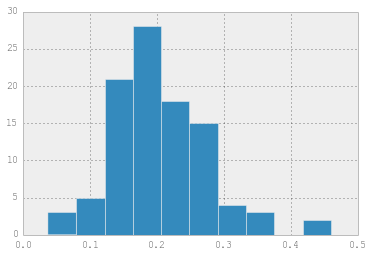

In [62]:
#dfo.scales.bfi_item39.hist()

dfo.sms.phase5t_DPsd.apply(lambda x: 1/x).hist()

## SPSS SYNTAX GENERATION

In [183]:
def variable_labels_syntax(varlist):
    var_labels = "VARIABLE LABELS \n{vlist}."
    vl_item = "    {var} '{label}'\n"
    vl_list = '\n'.join([vl_item.format(var=v, label=l) for (v, l) in varlist])
    return var_labels.format(vlist=vl_list)

#testing
print variable_labels_syntax(varlist = [("fff", "sssss")])

VARIABLE LABELS 
    fff 'sssss'
.


In [165]:
bfi={}
bfi['E'] = ['1', '6R', '11', '16', '21R', '26', '31R', '36']
bfi['A'] = ['2R', '7', '12R', '17', '22', '27R', '32', '37R', '42']
bfi['C']  = ['3', '8R', '13', '18R', '23R', '28', '33', '38', '43R']
bfi['N']  = ['4', '9R', '14', '19', '24R', '29', '34R', '39']
bfi['O']  = ['5', '10', '15', '20', '25', '30', '35R', '40', '41R', '44']

bfi_score = {}

for k, v in bfi.items():
    for i in v:
        reverse_scored = 'R' in i
        if reverse_scored:
            i = i[:-1]
        item = int(i)
        bfi_score[item] = {'factor': k,
                           'reverse_scored': reverse_scored}
    
bfi_score

{1: {'factor': 'E', 'reverse_scored': False},
 2: {'factor': 'A', 'reverse_scored': True},
 3: {'factor': 'C', 'reverse_scored': False},
 4: {'factor': 'N', 'reverse_scored': False},
 5: {'factor': 'O', 'reverse_scored': False},
 6: {'factor': 'E', 'reverse_scored': True},
 7: {'factor': 'A', 'reverse_scored': False},
 8: {'factor': 'C', 'reverse_scored': True},
 9: {'factor': 'N', 'reverse_scored': True},
 10: {'factor': 'O', 'reverse_scored': False},
 11: {'factor': 'E', 'reverse_scored': False},
 12: {'factor': 'A', 'reverse_scored': True},
 13: {'factor': 'C', 'reverse_scored': False},
 14: {'factor': 'N', 'reverse_scored': False},
 15: {'factor': 'O', 'reverse_scored': False},
 16: {'factor': 'E', 'reverse_scored': False},
 17: {'factor': 'A', 'reverse_scored': False},
 18: {'factor': 'C', 'reverse_scored': True},
 19: {'factor': 'N', 'reverse_scored': False},
 20: {'factor': 'O', 'reverse_scored': False},
 21: {'factor': 'E', 'reverse_scored': True},
 22: {'factor': 'A', 'reverse

In [131]:
print('ALTER TYPE')
print(' (F8.2)\n'.join(others) + ' (F8.2)')
print('.')

# Oops - these aren't the values in the dfo_flat output. Need to do this there instead,
# or import from the CSV I made there.

ALTER TYPE
session_isfemale (F8.2)
exclusion_jitterlinearmissing (F8.2)
exclusion_rhythmadminerror (F8.2)
sex_femalezero (F8.2)
participant_age (F8.2)
calc_wasivocab_totalrawscore (F8.2)
calc_wasimatrix_totalscore (F8.2)
calc_wasivocab_tscore (F8.2)
calc_wasimatrix_tscore (F8.2)
calc_wasi_tscore_total (F8.2)
calc_fsiq2 (F8.2)
calc_bfi_extraversion (F8.2)
calc_bfi_agreeableness (F8.2)
calc_bfi_conscientiousness (F8.2)
calc_bfi_neuroticism (F8.2)
calc_bfi_openness (F8.2)
calc_qmusic_socialimportance (F8.2)
order_500ms_first (F8.2)
order_rhythmfirst (F8.2)
wasivocab_itemscore01_fish (F8.2)
wasivocab_itemscore02_shovel (F8.2)
wasivocab_itemscore03_shell (F8.2)
wasivocab_itemscore04_shirt (F8.2)
wasivocab_itemscore05_car (F8.2)
wasivocab_itemscore06_lamp (F8.2)
wasivocab_itemscore07_bird (F8.2)
wasivocab_itemscore08_tongue (F8.2)
wasivocab_itemscore09_pet (F8.2)
wasivocab_itemscore10_lunch (F8.2)
wasivocab_itemscore11_bell (F8.2)
wasivocab_itemscore12_calendar (F8.2)
wasivocab_itemscore13_a

In [190]:
varlist = []
for k, v in bfi_score.items():
    name = "SCAL_bfi_item" + str(k)
    factor = v['factor']
    label = "BFI item {n} ({f})".format(n=k, f=factor)
    return
#bfi_vars

BFI item 1 (E)
BFI item 2 (A)
BFI item 3 (C)
BFI item 4 (N)
BFI item 5 (O)
BFI item 6 (E)
BFI item 7 (A)
BFI item 8 (C)
BFI item 9 (N)
BFI item 10 (O)
BFI item 11 (E)
BFI item 12 (A)
BFI item 13 (C)
BFI item 14 (N)
BFI item 15 (O)
BFI item 16 (E)
BFI item 17 (A)
BFI item 18 (C)
BFI item 19 (N)
BFI item 20 (O)
BFI item 21 (E)
BFI item 22 (A)
BFI item 23 (C)
BFI item 24 (N)
BFI item 25 (O)
BFI item 26 (E)
BFI item 27 (A)
BFI item 28 (C)
BFI item 29 (N)
BFI item 30 (O)
BFI item 31 (E)
BFI item 32 (A)
BFI item 33 (C)
BFI item 34 (N)
BFI item 35 (O)
BFI item 36 (E)
BFI item 37 (A)
BFI item 38 (C)
BFI item 39 (N)
BFI item 40 (O)
BFI item 41 (O)
BFI item 42 (A)
BFI item 43 (C)
BFI item 44 (O)
